In [1]:
# Importing Pandas and NumPy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset file

lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_df.shape

(9240, 37)

In [5]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#Checking the null count values
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Calculate the percentage of null values in each column

null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
#Checking for the column having null values more than 40%
null_percentage= lead_df.isnull().mean()*100
null_percentage[null_percentage>40]

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Index     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Score     45.649351
dtype: float64

In [9]:
# Loop through each column and print unique values
for column in lead_df.columns:
    unique_values = lead_df[column].unique()
    print(f"{column}: {unique_values}")

Prospect ID: ['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Number: [660737 660728 660727 ... 579545 579538 579533]
Lead Origin: ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source: ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email: ['No' 'Yes']
Do Not Call: ['No' 'Yes']
Converted: [0 1]
TotalVisits: [  0.   5.   2.   1.   4.   8.  11.   6.   3.   7.  13.  17.  nan   9.
  12.  10.  16.  14.  21.  15.  22.  19.  18.  20.  43.  30.  23.  55.
 141.  25.  27.  29.  24.  28.  26.  74.  41.  54. 115. 251

In [10]:
for column in lead_df.columns:
    unique_count = lead_df[column].nunique()
    print(f"{column}: {unique_count}")

Prospect ID: 9240
Lead Number: 9240
Lead Origin: 5
Lead Source: 21
Do Not Email: 2
Do Not Call: 2
Converted: 2
TotalVisits: 41
Total Time Spent on Website: 1731
Page Views Per Visit: 114
Last Activity: 17
Country: 38
Specialization: 19
How did you hear about X Education: 10
What is your current occupation: 6
What matters most to you in choosing a course: 3
Search: 2
Magazine: 1
Newspaper Article: 2
X Education Forums: 2
Newspaper: 2
Digital Advertisement: 2
Through Recommendations: 2
Receive More Updates About Our Courses: 1
Tags: 26
Lead Quality: 5
Update me on Supply Chain Content: 1
Get updates on DM Content: 1
Lead Profile: 6
City: 7
Asymmetrique Activity Index: 3
Asymmetrique Profile Index: 3
Asymmetrique Activity Score: 12
Asymmetrique Profile Score: 10
I agree to pay the amount through cheque: 1
A free copy of Mastering The Interview: 2
Last Notable Activity: 16


In [11]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# EDA

In [12]:
# Taking the list of the columns having null values more than 40%
null_values_list = null_percentage[null_percentage>40].index.tolist()

In [13]:
# Dropping the column having null values more than 40%, since imputation of values can majorly effect the results of EDA

lead_df.drop(null_values_list, axis = 1, inplace = True)

In [14]:
lead_df.shape

(9240, 32)

In [15]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [16]:
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Fo

In [18]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [19]:
search_columns = lead_df.columns[16:22]
search_columns

Index(['Search', 'Magazine', 'Newspaper Article', 'X Education Forums',
       'Newspaper', 'Digital Advertisement'],
      dtype='object')

In [20]:
# Dropping Search columns and related fields as it has an extreme dataimbalance.
lead_df.drop(search_columns, axis = 1, inplace = True)

In [21]:
lead_df.shape

(9240, 26)

In [22]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

7927b2df-8bba-4d29-b9a2-b6e0beafe620    0.000108
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    0.000108
46befc49-253a-419b-abea-2fd978d2e2b1    0.000108
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    0.000108
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    0.000108
                                          ...   
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    0.000108
644099a2-3da4-4d23-9546-7676340a372b    0.000108
2a093175-415b-4321-9e69-ed8d9df65a3c    0.000108
c66249a3-8500-4c66-a511-312d914573de    0.000108
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
660737    0.000108
603303    0.000108
602561    0.000108
602557    0.000108
602540    0.000108
            ...   
630422    0.000108
630405    0.000108
630403    0.000108
630390    0.000108
579533    0.000108
Name: Lead Number, Length: 9240, dtype: float64
Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Fo

##### Below are the columns which either has data imbalance or the field is does not relevent with respect to analysis, therefore dropping these columns
- Do not Email
- Lead Source
- Prospect ID
- Lead Number
- What matters most to you in choosing a course
- Through Recommendations
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- Get updates on DM Content
- I agree to pay the amount through cheque

In [23]:
drop_columns = ['Do Not Call','Do Not Email','Lead Source','Prospect ID','Lead Number','What matters most to you in choosing a course','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque']

In [24]:
# Dropping drop columns 
lead_df.drop(drop_columns, axis = 1, inplace = True)

In [25]:
lead_df.shape

(9240, 15)

In [26]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64
0    0.61461
1    0.38539
Name: Converted, dtype: float64
0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0    

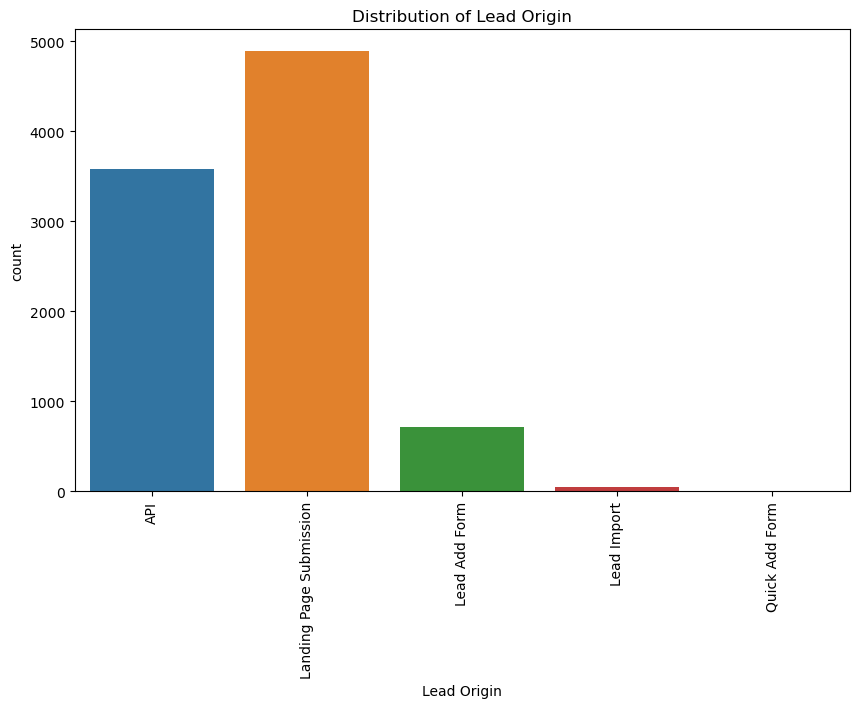

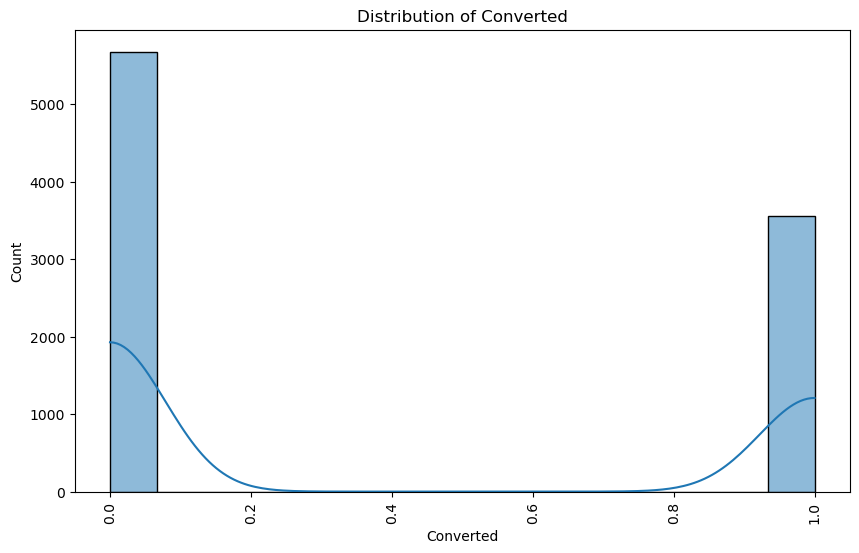

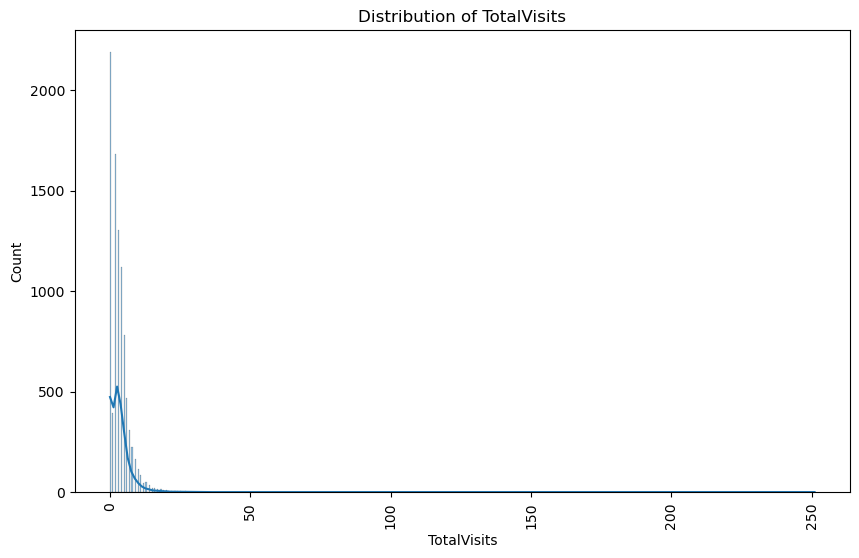

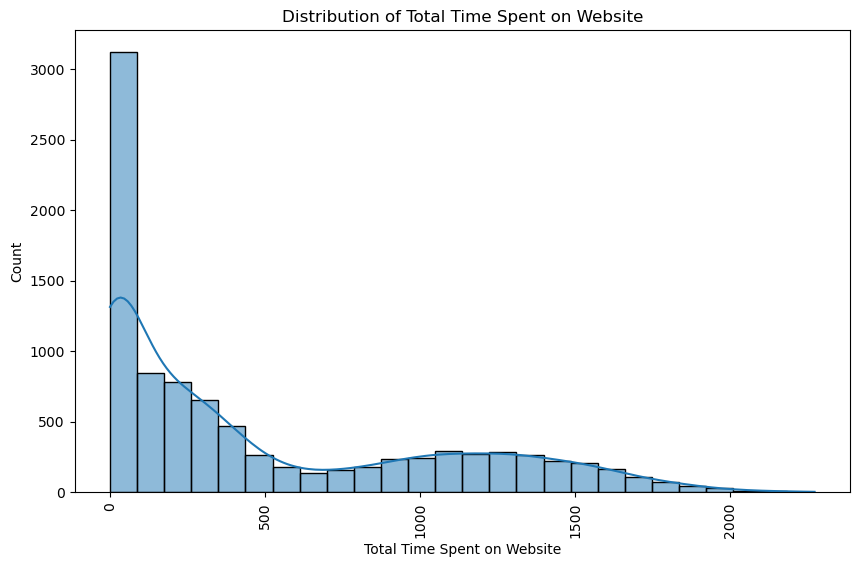

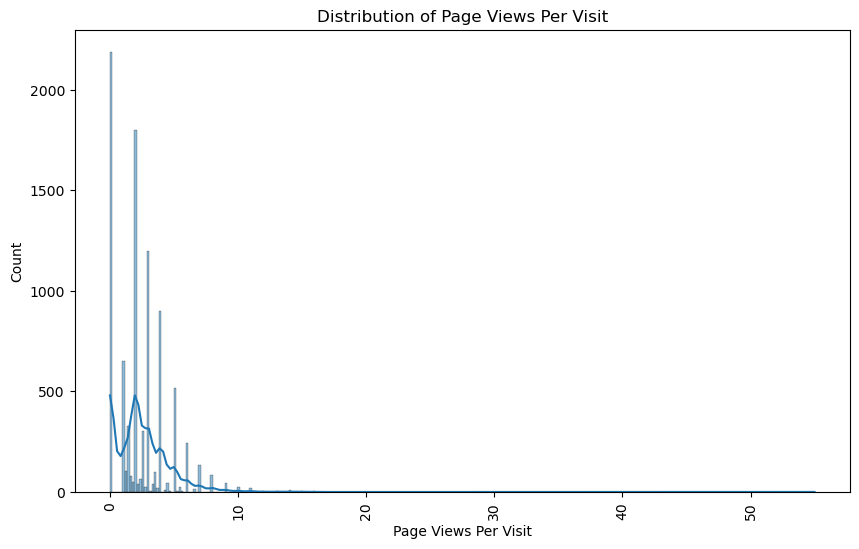

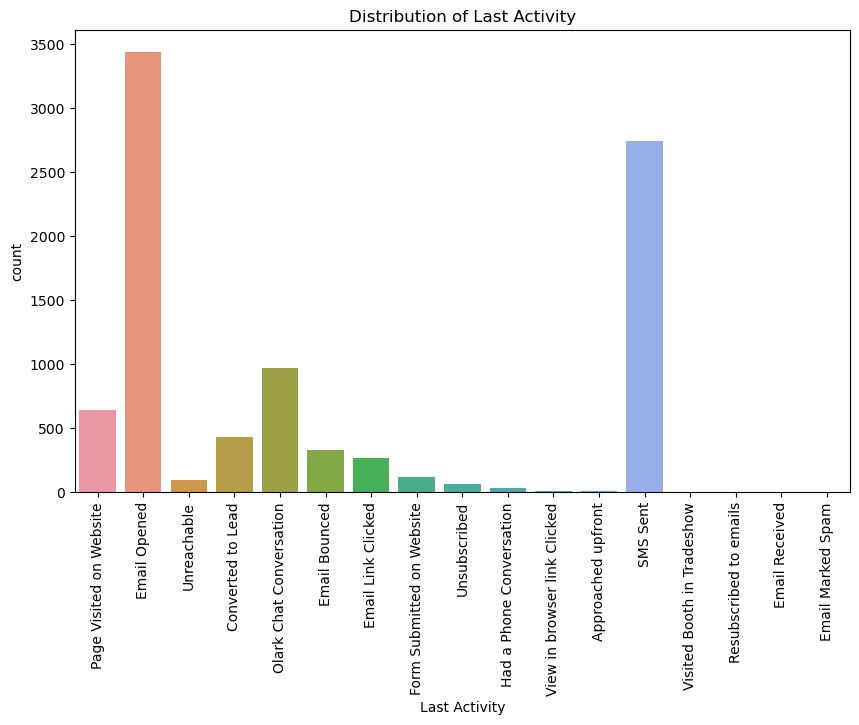

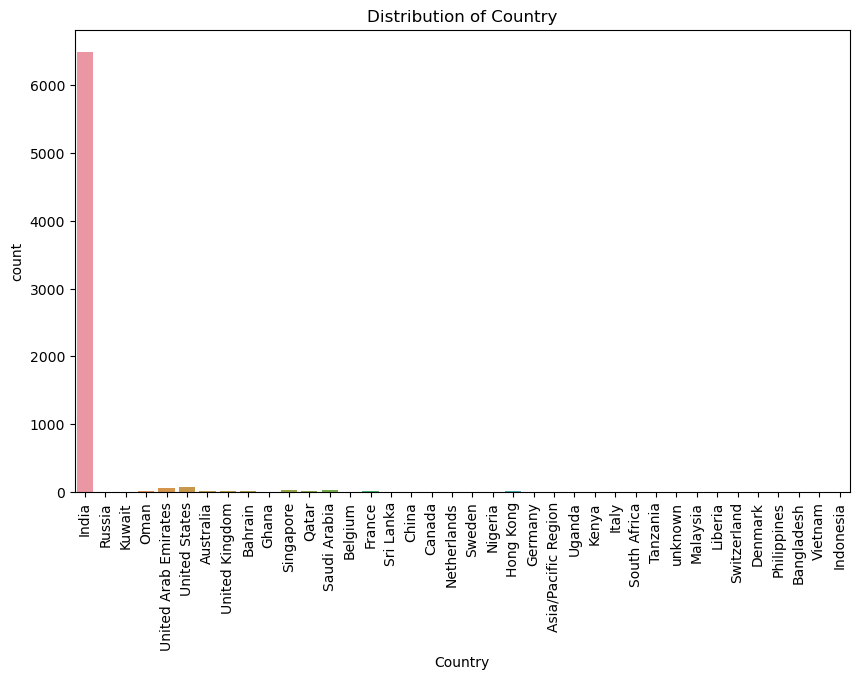

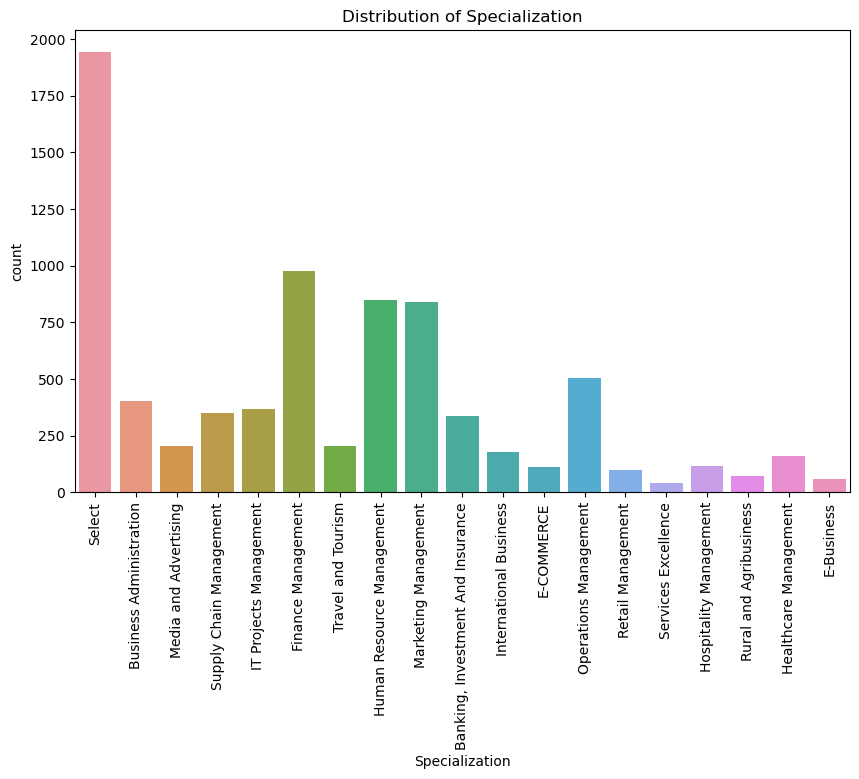

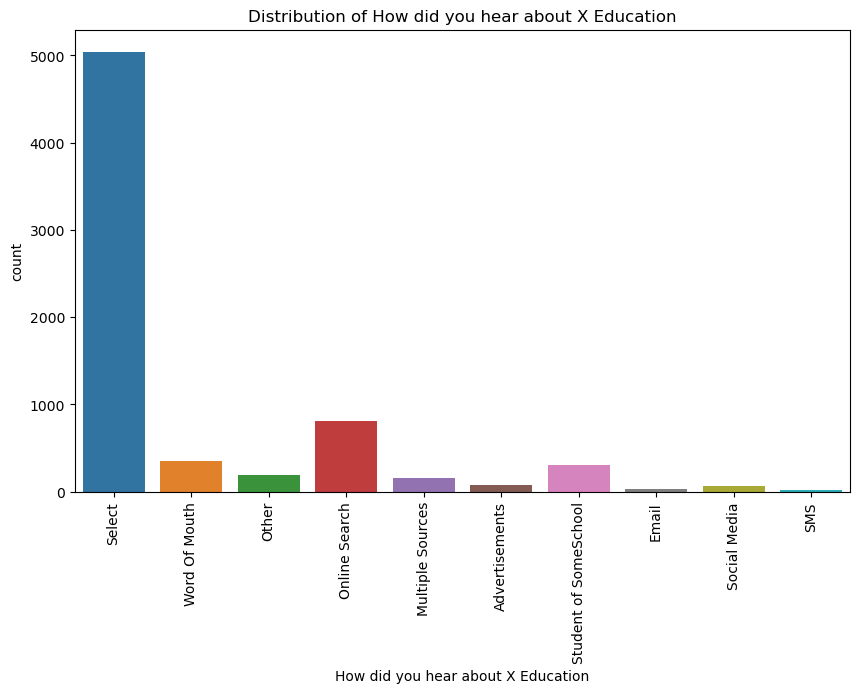

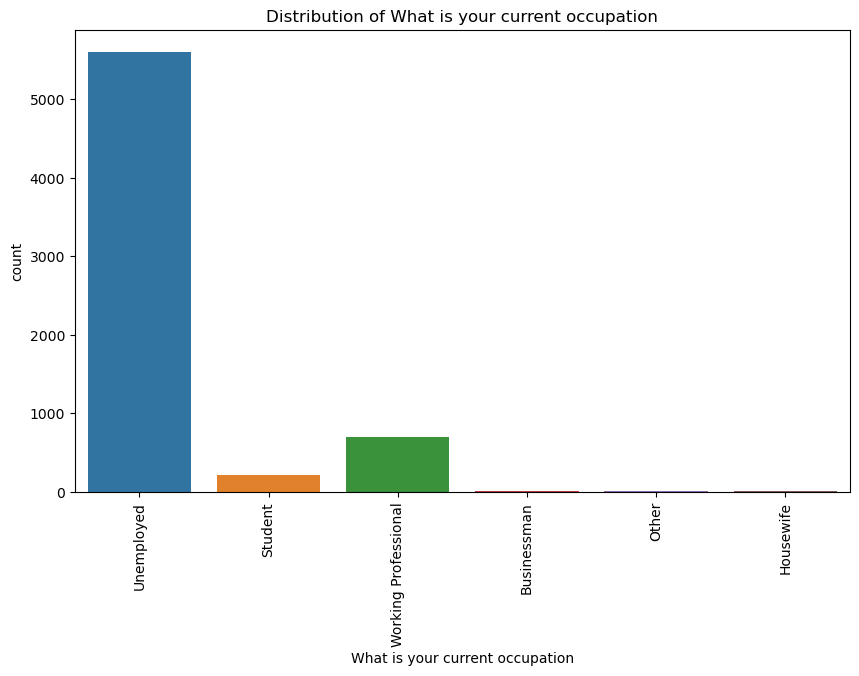

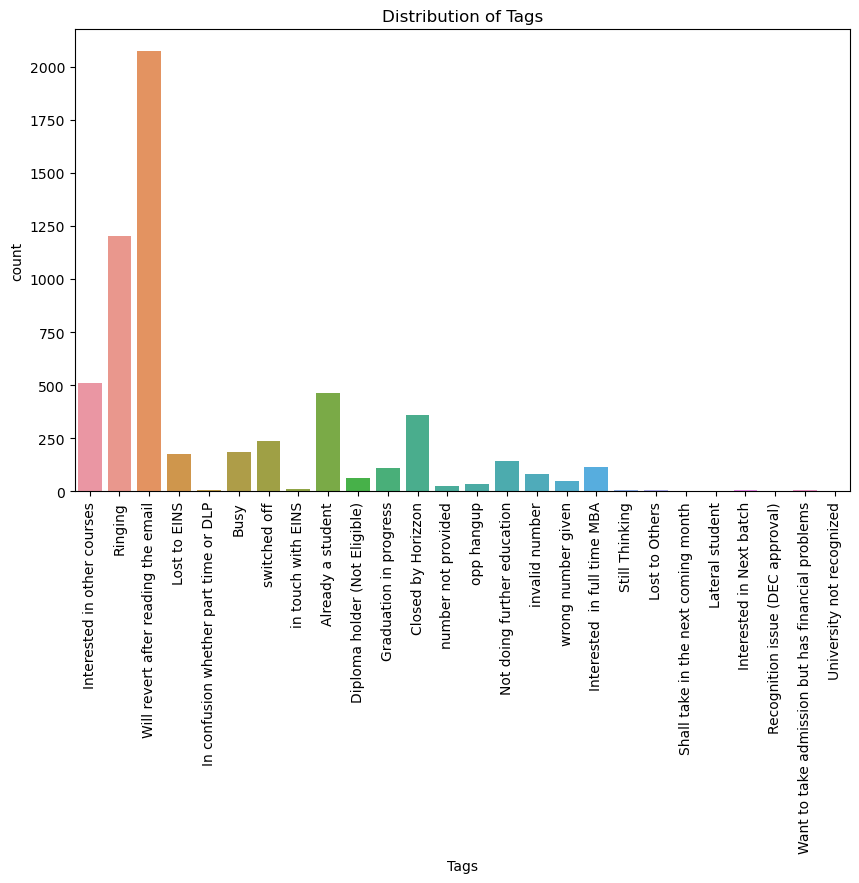

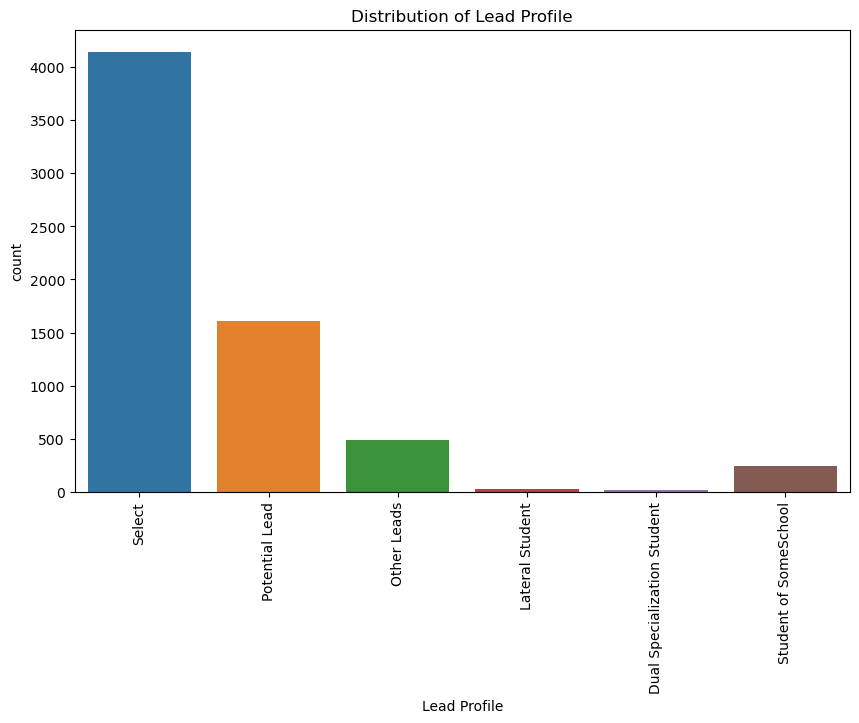

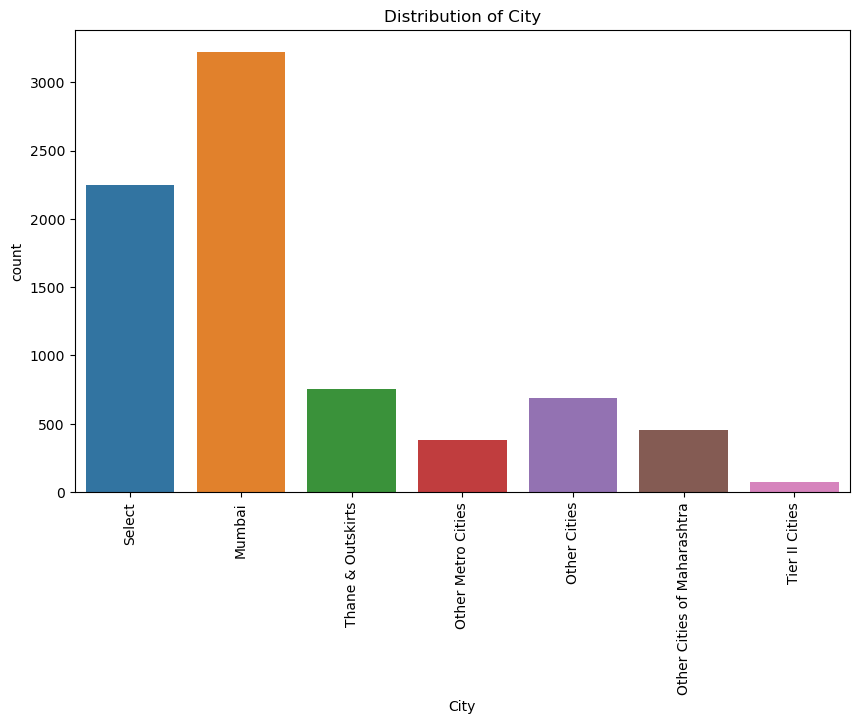

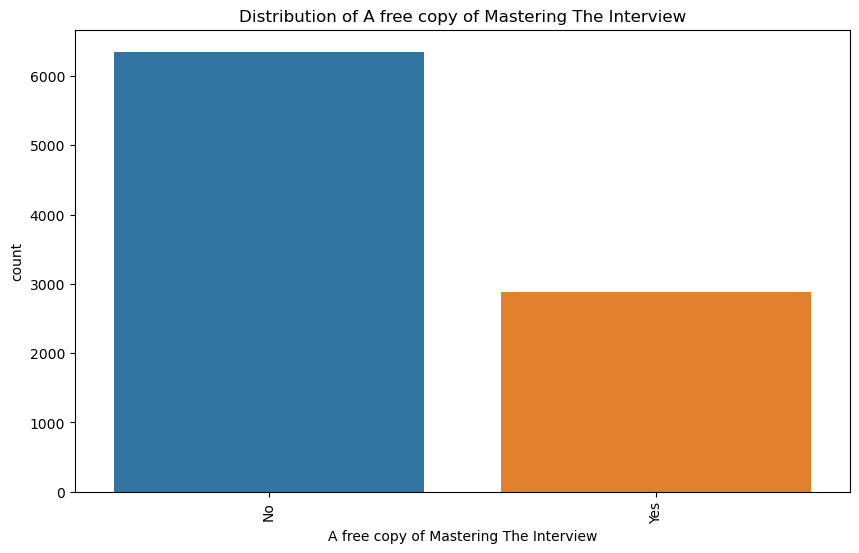

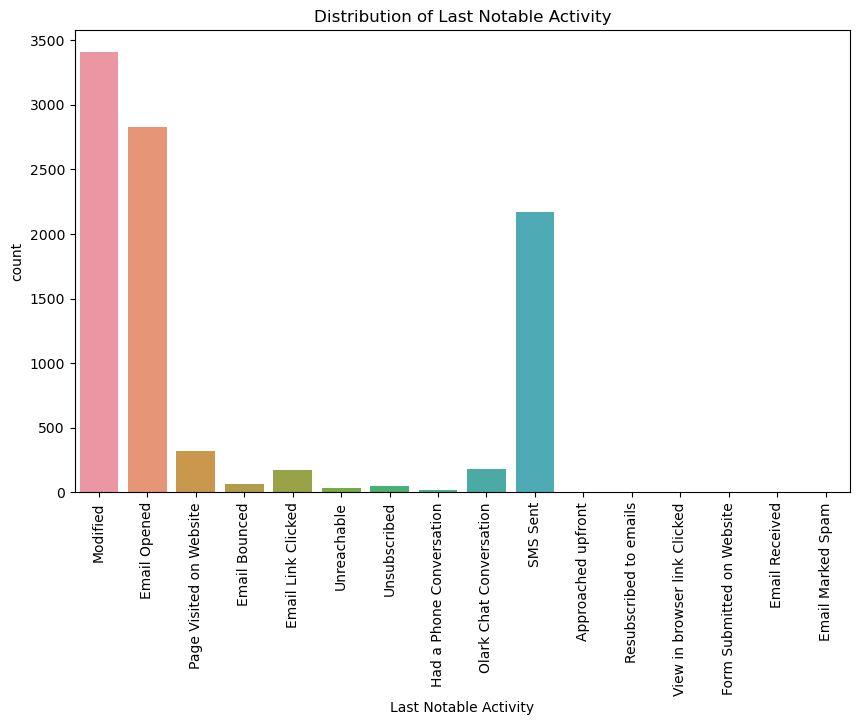

In [27]:
# Checking the value distribution for each of the column

for column in lead_df.columns:
    plt.figure(figsize=(10, 6))
    
    if lead_df[column].dtype == 'object':  # Categorical columns
        sns.countplot(data=lead_df, x=column)
    else:  # Numerical columns
        sns.histplot(data=lead_df, x=column, kde=True)
    
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [28]:
#Checking the counf of Select value for each of the columns

target_value = 'Select'

# Initialize a dictionary to store counts for each column
value_counts_dict = {}

# Loop through each column and calculate the count for the target value
for column in lead_df.columns:
    count = lead_df[column].value_counts().get(target_value, 0)  # Get count or 0 if value not present
    value_counts_dict[column] = count

# Print the counts for each column
for column, count in value_counts_dict.items():
    print(f"Count of '{target_value}' in '{column}': {count}")

Count of 'Select' in 'Lead Origin': 0
Count of 'Select' in 'Converted': 0
Count of 'Select' in 'TotalVisits': 0
Count of 'Select' in 'Total Time Spent on Website': 0
Count of 'Select' in 'Page Views Per Visit': 0
Count of 'Select' in 'Last Activity': 0
Count of 'Select' in 'Country': 0
Count of 'Select' in 'Specialization': 1942
Count of 'Select' in 'How did you hear about X Education': 5043
Count of 'Select' in 'What is your current occupation': 0
Count of 'Select' in 'Tags': 0
Count of 'Select' in 'Lead Profile': 4146
Count of 'Select' in 'City': 2249
Count of 'Select' in 'A free copy of Mastering The Interview': 0
Count of 'Select' in 'Last Notable Activity': 0


In [29]:
# In the above line we can see 4columns have a high number of select values which can be considered as null values
# Since select value can be considered as null value therefore replacing Select with null value
value_to_replace = 'Select'

# List of columns which has Select values
columns_to_replace = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

# Replace the value with NaN in the specified columns
lead_df[columns_to_replace] = lead_df[columns_to_replace].replace(value_to_replace, pd.NA)

In [30]:
# Now after replacing the Select with null values checking the count of null values in each column
lead_df.isnull().sum()

Lead Origin                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
How did you hear about X Education        7250
What is your current occupation           2690
Tags                                      3353
Lead Profile                              6855
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [31]:
#Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
How did you hear about X Education        78.463203
What is your current occupation           29.112554
Tags                                      36.287879
Lead Profile                              74.188312
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [32]:
#Checking for the column having null values more than 40%
null_percentage= lead_df.isnull().mean()*100
null_percentage[null_percentage>40]

How did you hear about X Education    78.463203
Lead Profile                          74.188312
dtype: float64

In [33]:
#Taking the list of the columns having null values more than 40%
null_values_list = null_percentage[null_percentage>40].index.tolist()

In [34]:
# Dropping the column having null values more than 40%, since imputation of values can majorly effect the results of EDA

lead_df.drop(null_values_list, axis = 1, inplace = True)

In [35]:
#Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                                0.000000
Converted                                  0.000000
TotalVisits                                1.482684
Total Time Spent on Website                0.000000
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Country                                   26.634199
Specialization                            36.580087
What is your current occupation           29.112554
Tags                                      36.287879
City                                      39.707792
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

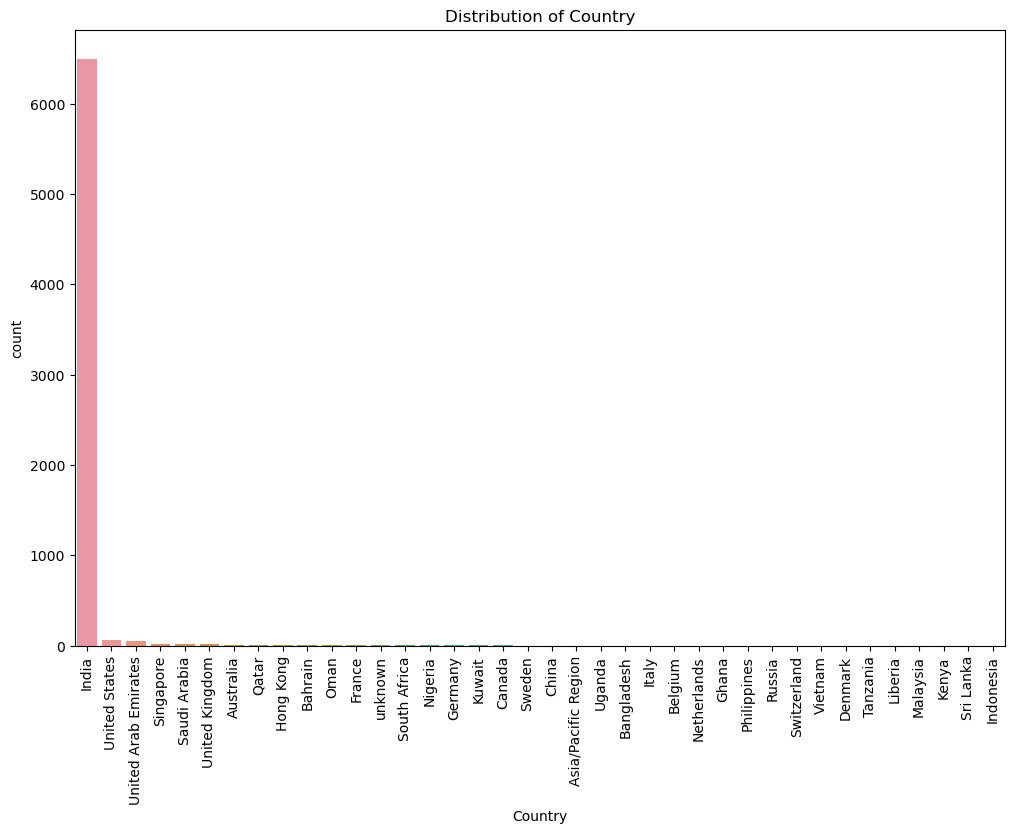

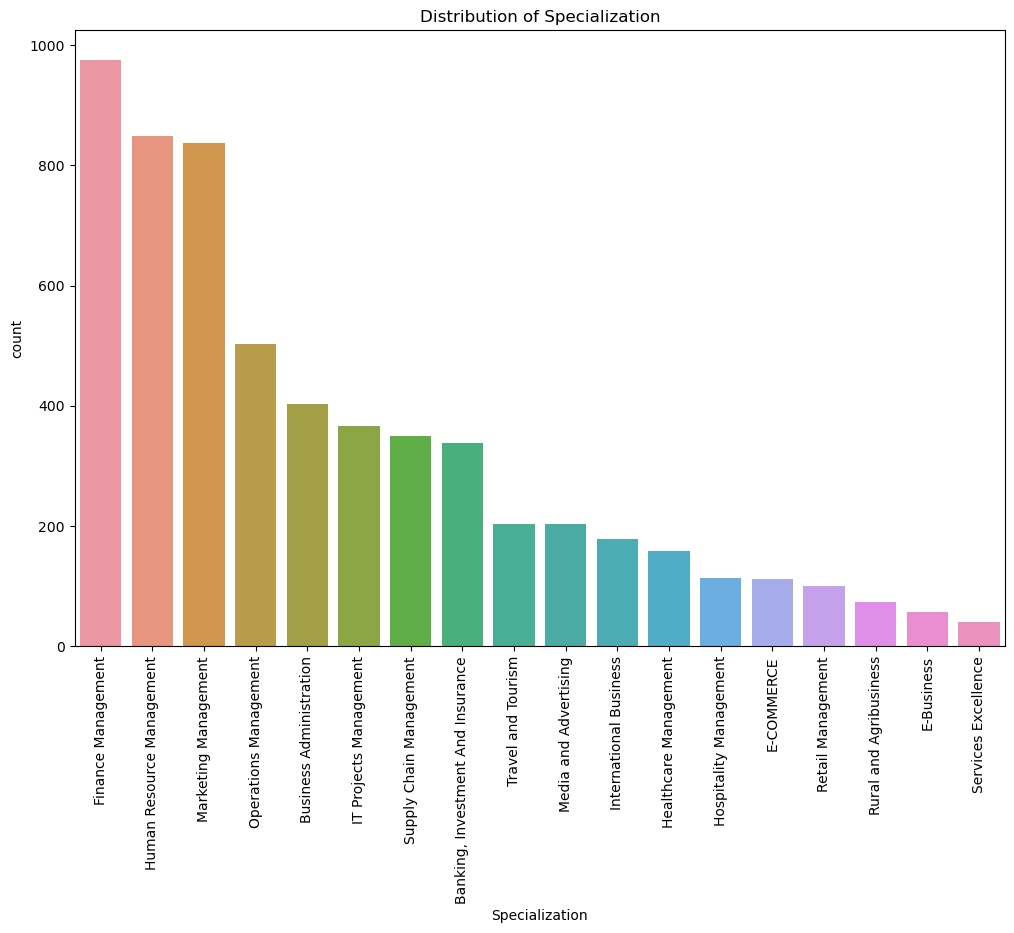

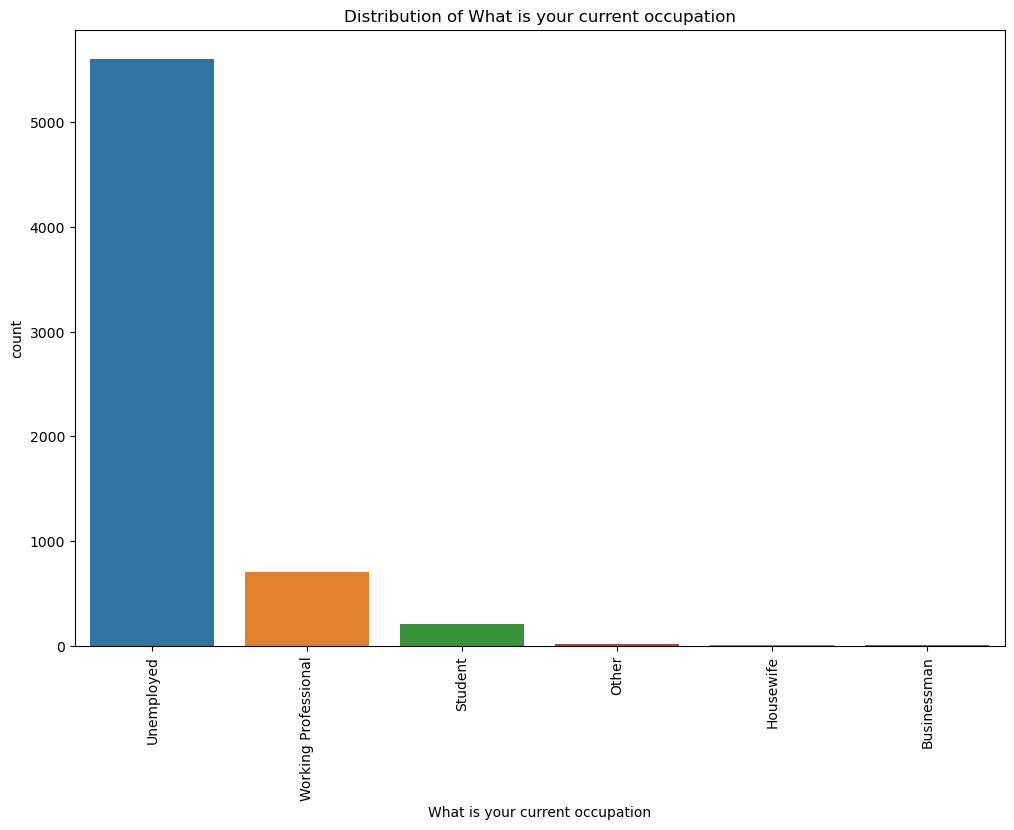

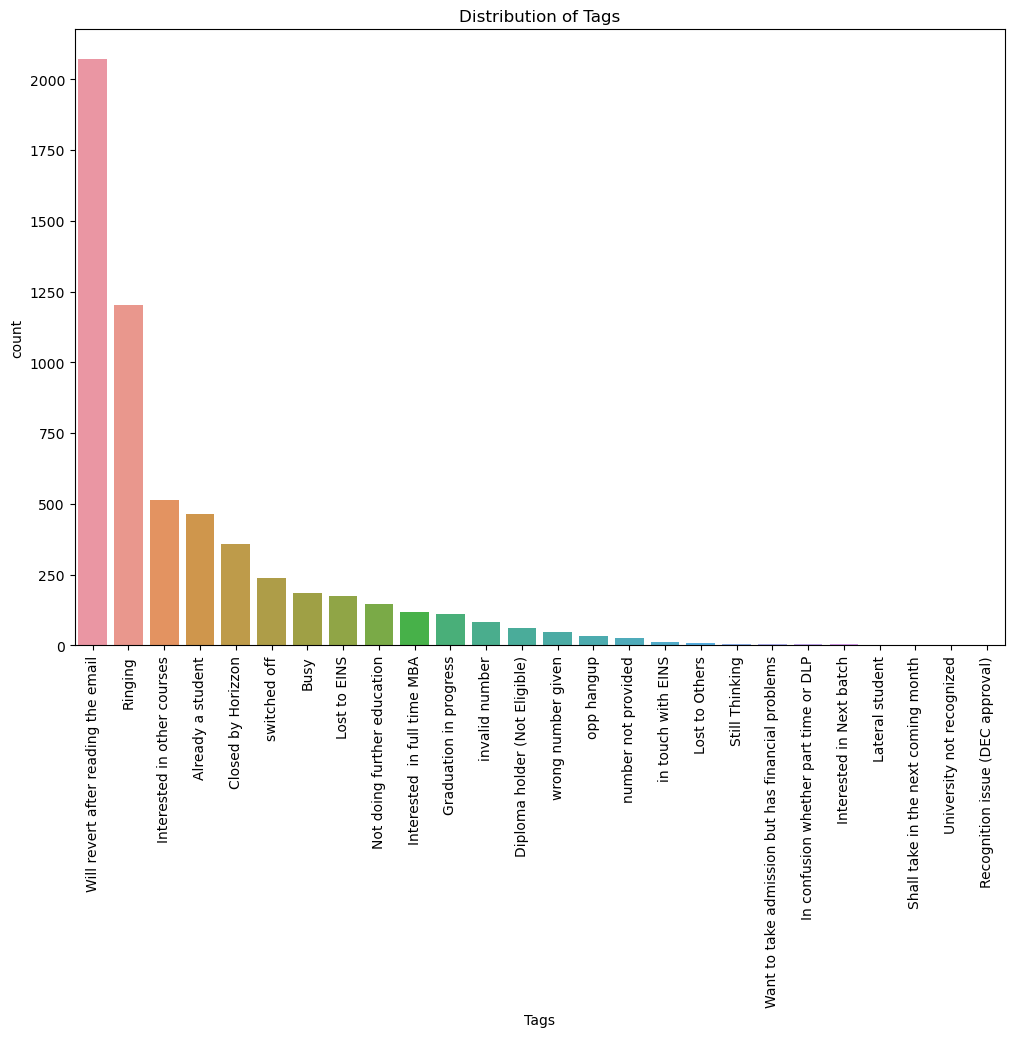

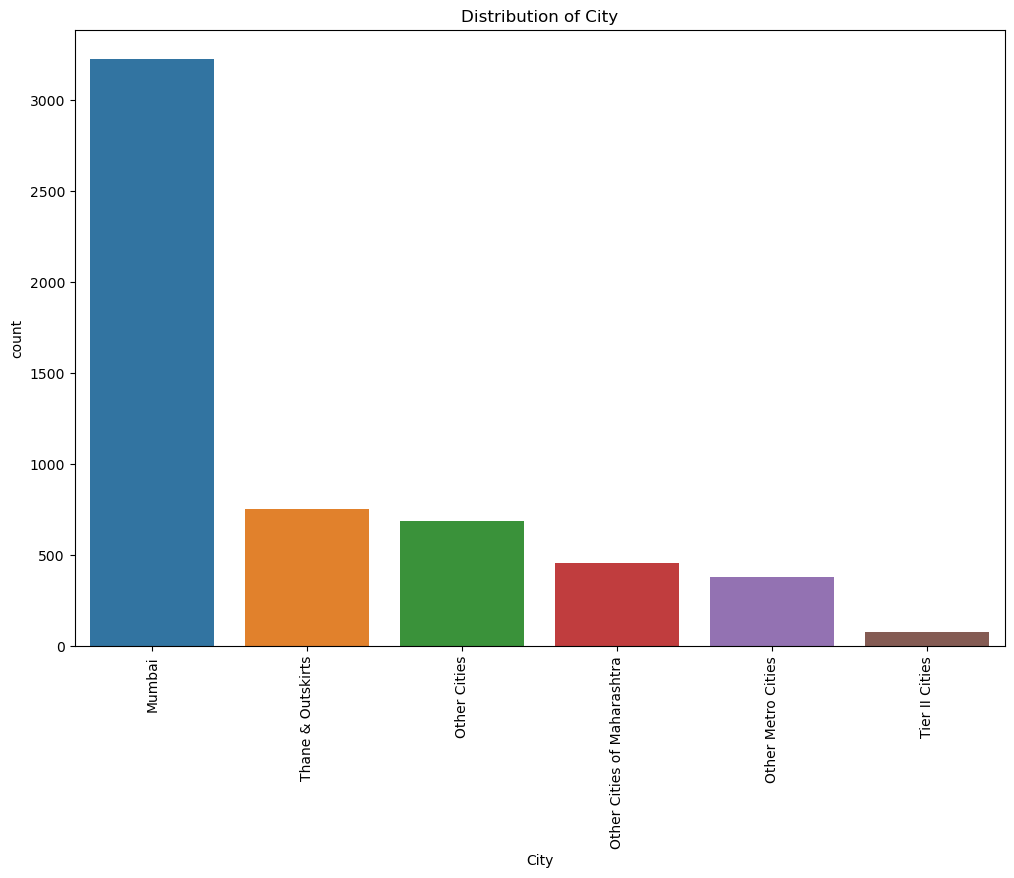

In [36]:
# Checking the values distribution of Country, Specilization, What is your current occupation, Tags and City
value_dist_def = ['Country', 'Specialization', 'What is your current occupation','Tags','City']
for column in value_dist_def:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=lead_df, x=column, order=lead_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [37]:
# Since these 4 columns have relatively high percentage of missing values dropping the rows will result in loosing huge amount of data.
# Therefore replacing the null values with the Mode of the data.

# List of columns with null values to replace
columns_to_replace = ['Country', 'Specialization', 'What is your current occupation','Tags','City']

# Loop through each column and replace null values with mode
for column in columns_to_replace:
    mode_value = lead_df[column].mode()[0]  # Get the mode value
    lead_df[column].fillna(mode_value, inplace=True)

In [38]:
# Checking the percentage of null values
null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                               0.000000
Converted                                 0.000000
TotalVisits                               1.482684
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.482684
Last Activity                             1.114719
Country                                   0.000000
Specialization                            0.000000
What is your current occupation           0.000000
Tags                                      0.000000
City                                      0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [39]:
# Since columns 'TotalVisits', 'Page Views Per Visit', 'Last Activity' has low null value percentage therefore dropping these rows.
# Dropping these will not result in dropping big crunch of data.

# Drop rows with null values in specific columns
columns_to_check = ['TotalVisits', 'Page Views Per Visit', 'Last Activity']
lead_df = lead_df.dropna(subset=columns_to_check)

In [40]:
# Checking the percentage of null values

null_percentage = (lead_df.isnull().sum() / len(lead_df)) * 100
null_percentage

Lead Origin                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
What is your current occupation           0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [41]:
lead_df.shape

(9103, 13)

In [42]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64
0    0.619796
1    0.380204
Name: Converted, dtype: float64
0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0     0.000110
Name: TotalVisits, dtype

## Univariate Analysis and Bivariate Analysis

In [43]:
# Dviding the dataset columns into two parts categorical and continuous
categorical_columns = ['Lead Origin','Last Activity','Country','Specialization','What is your current occupation','Tags','A free copy of Mastering The Interview','Last Notable Activity']
continuous_columns = ['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']

#### Univariate Analysis

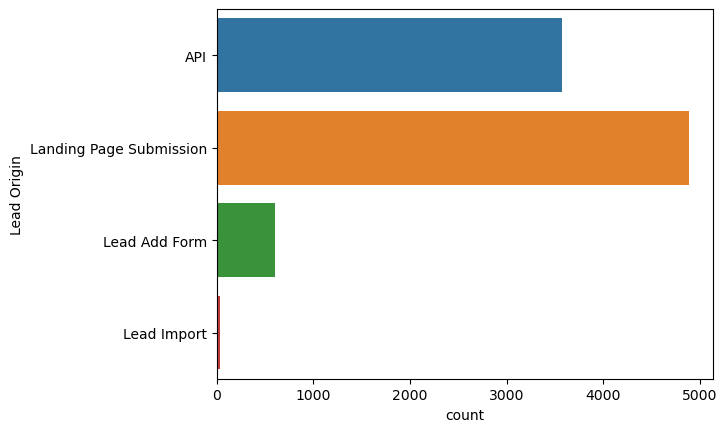

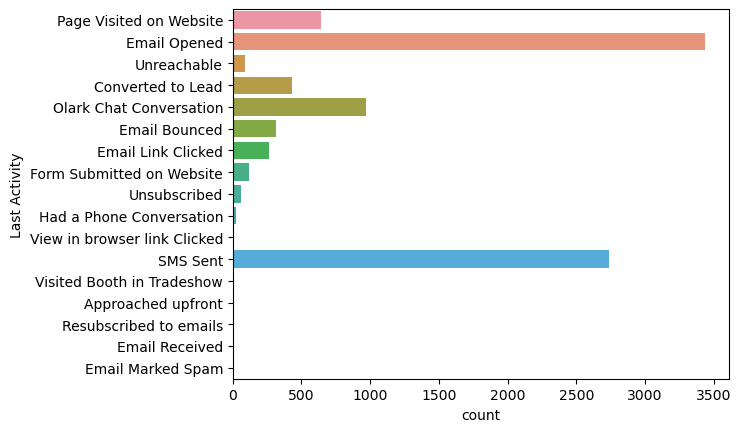

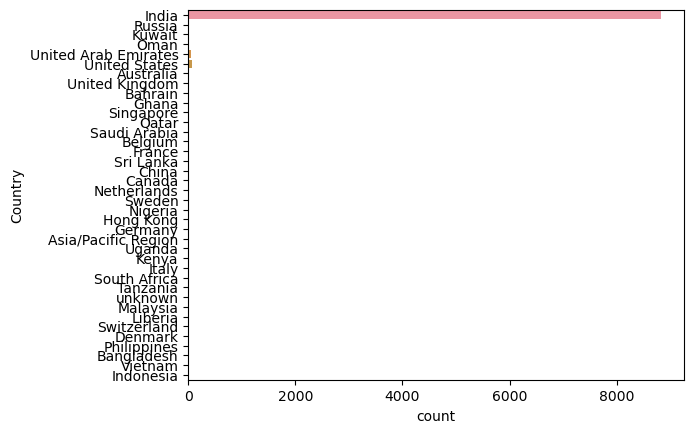

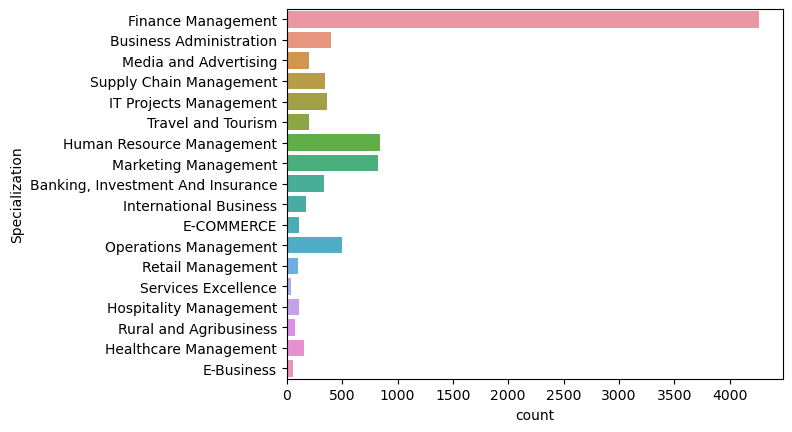

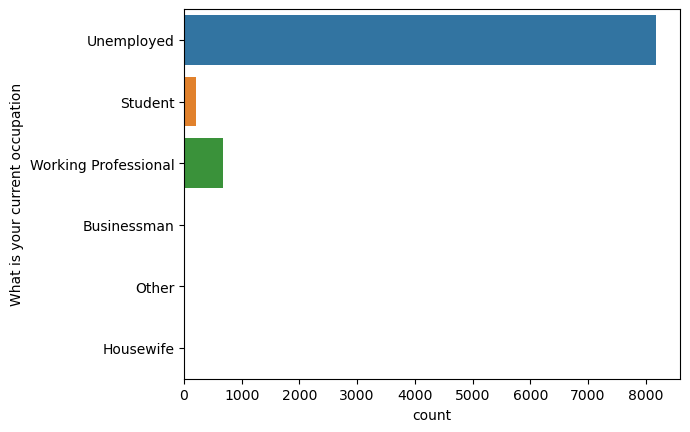

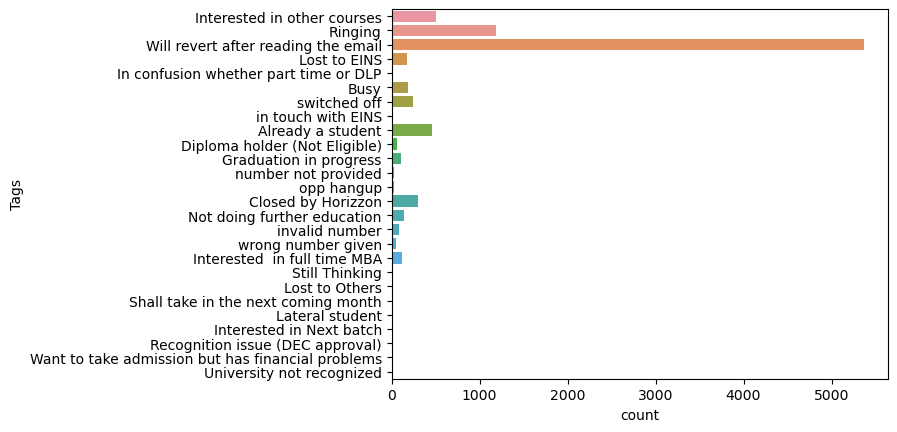

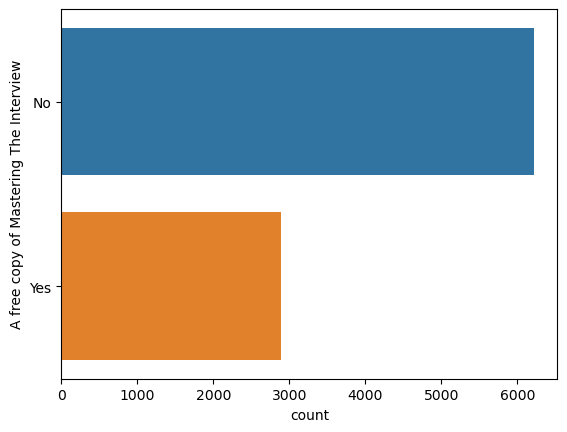

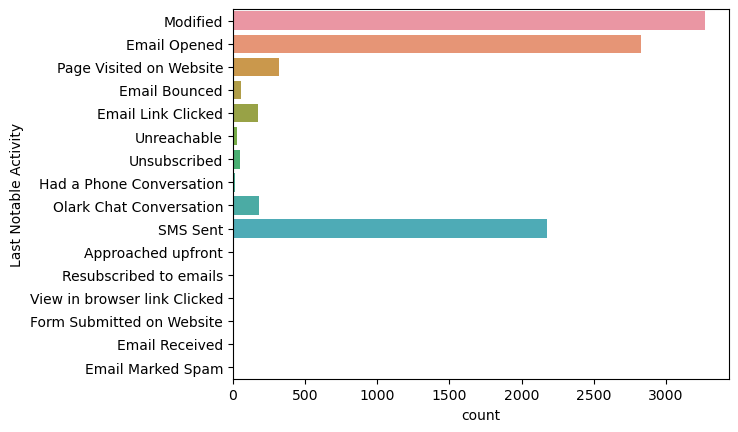

In [44]:
# Making graphs for the categorical variables
for i in categorical_columns:
    sns.countplot(data=lead_df,y=i)
    plt.show()

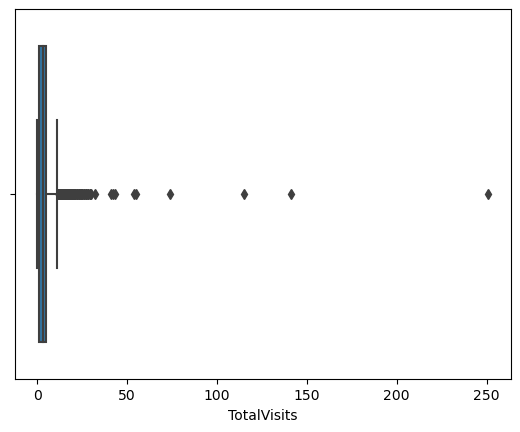

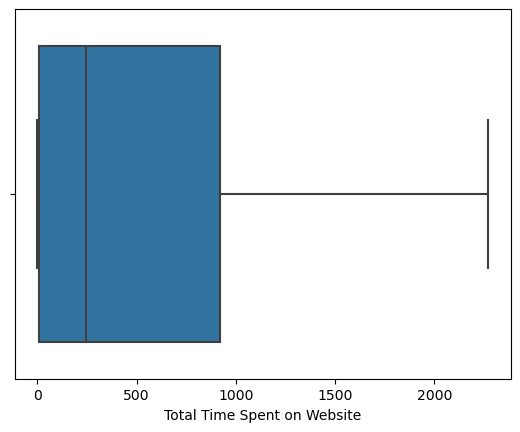

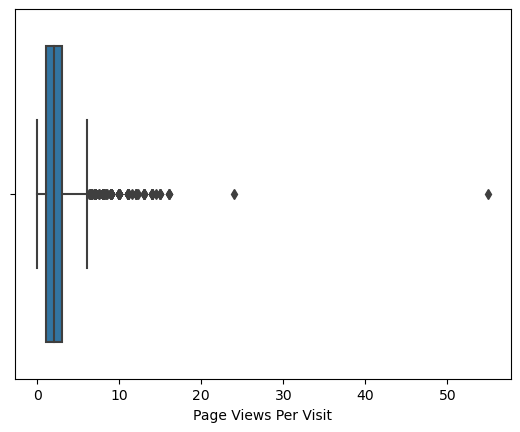

In [45]:
# Making grphs for the continuous variables
for i in continuous_columns:
    sns.boxplot(lead_df[i])
    plt.show()

### Bi-variate Analysis

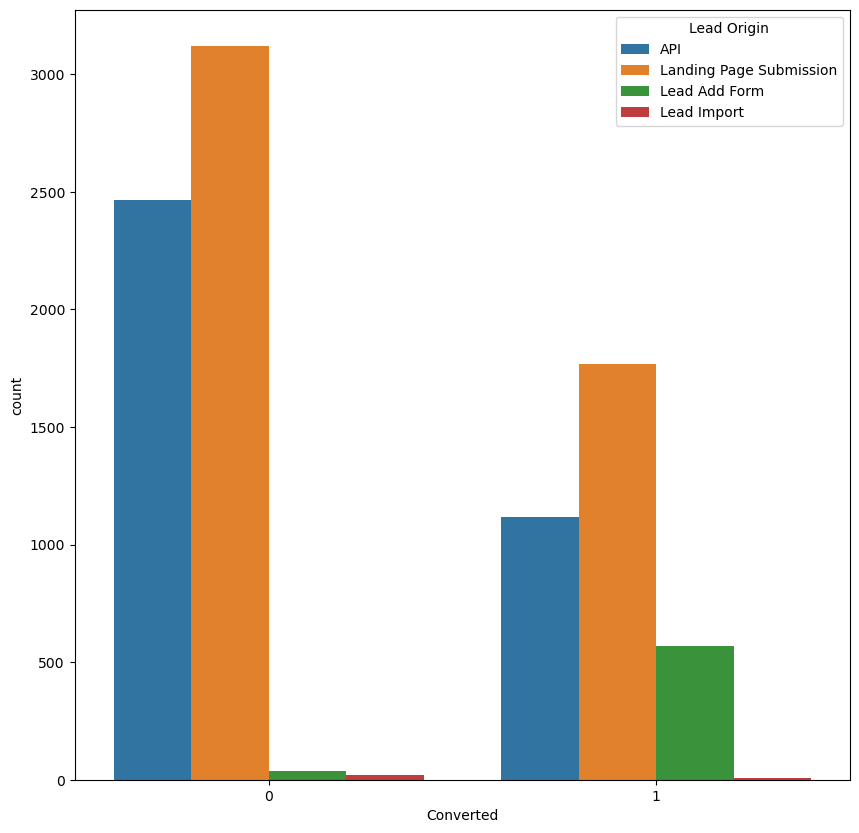

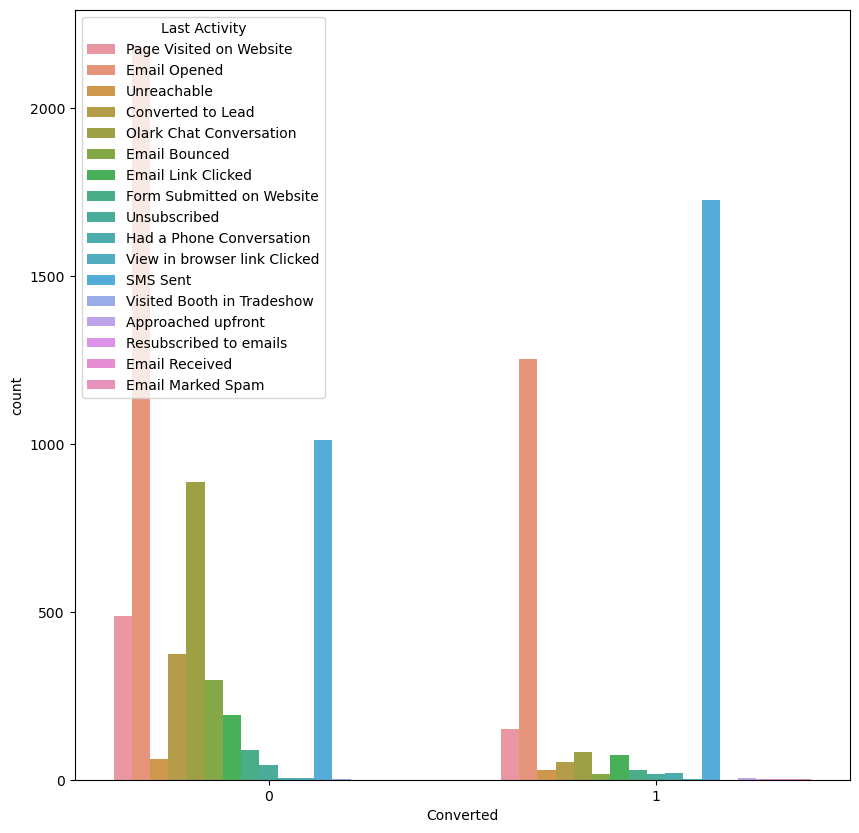

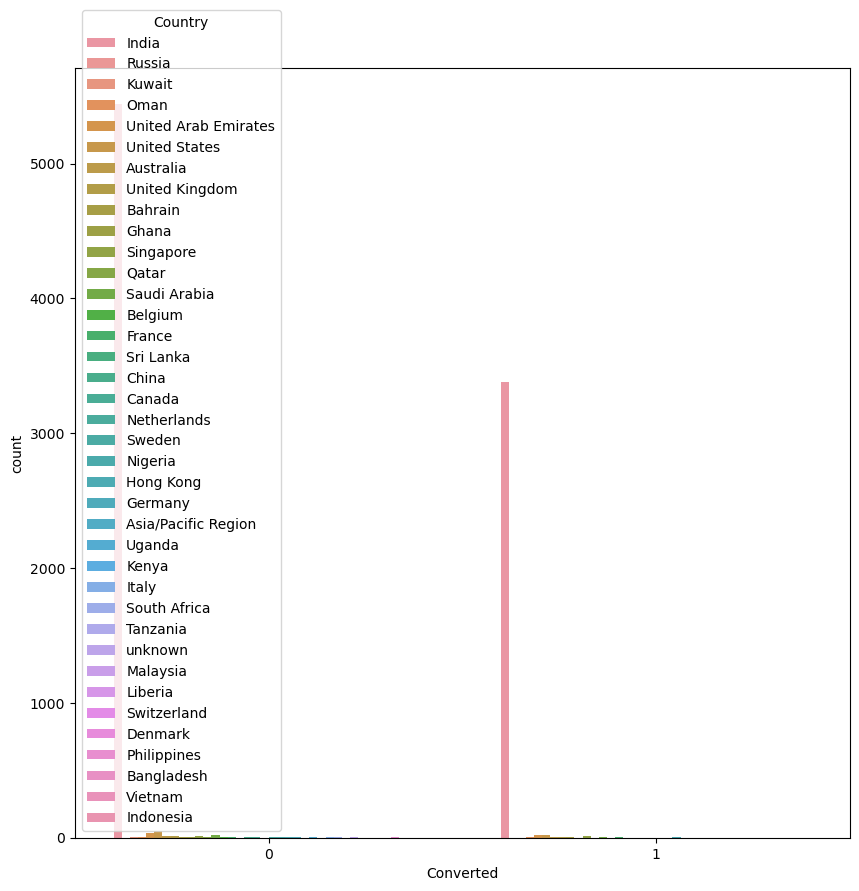

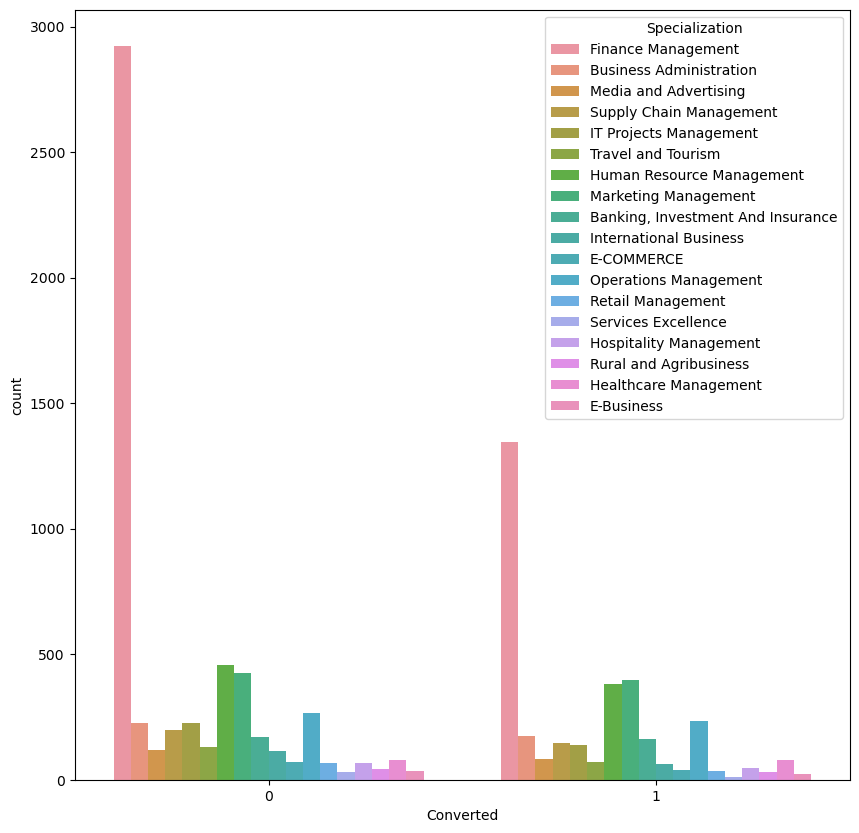

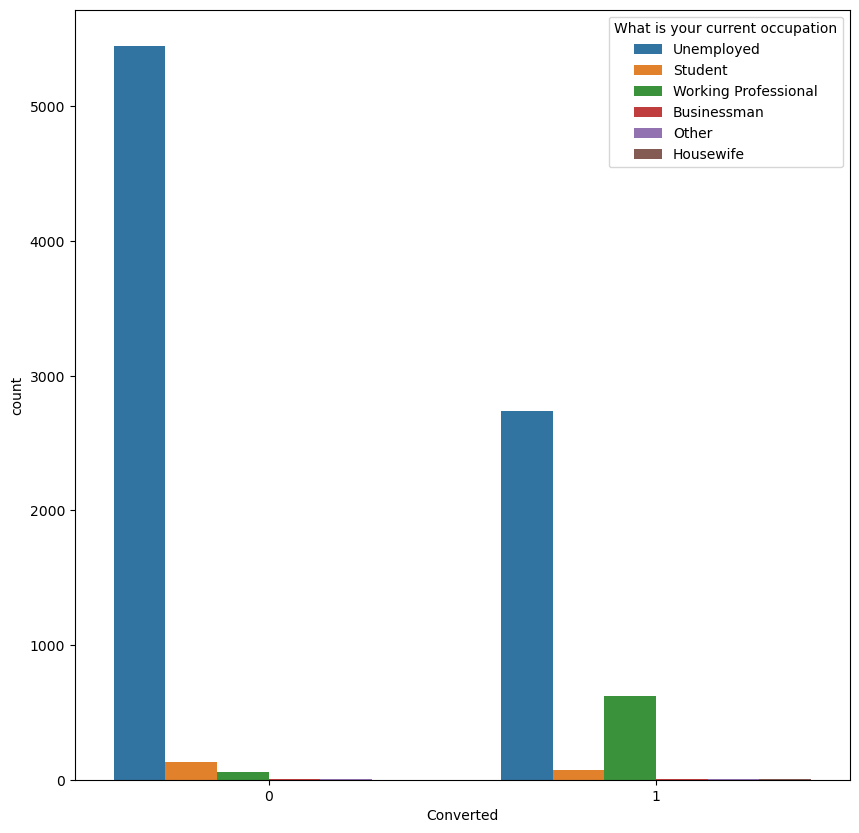

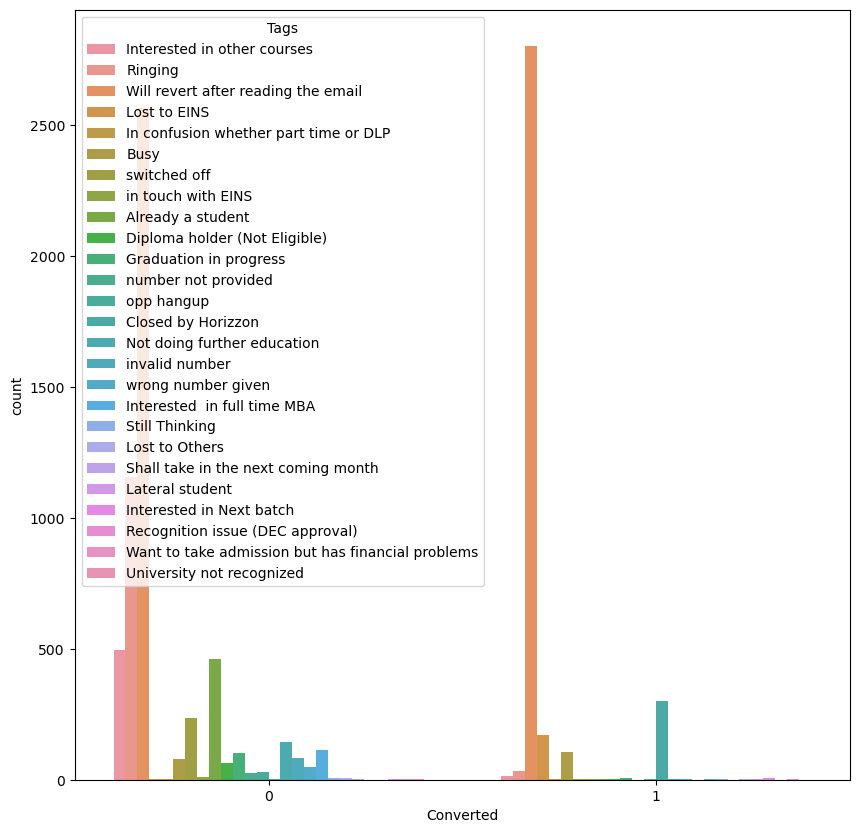

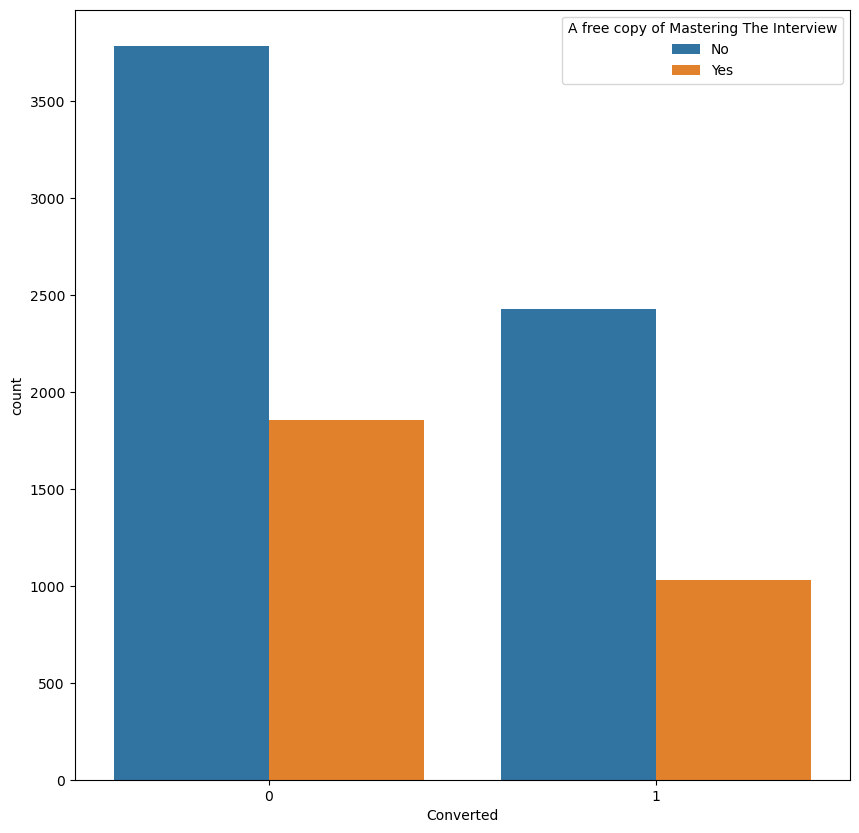

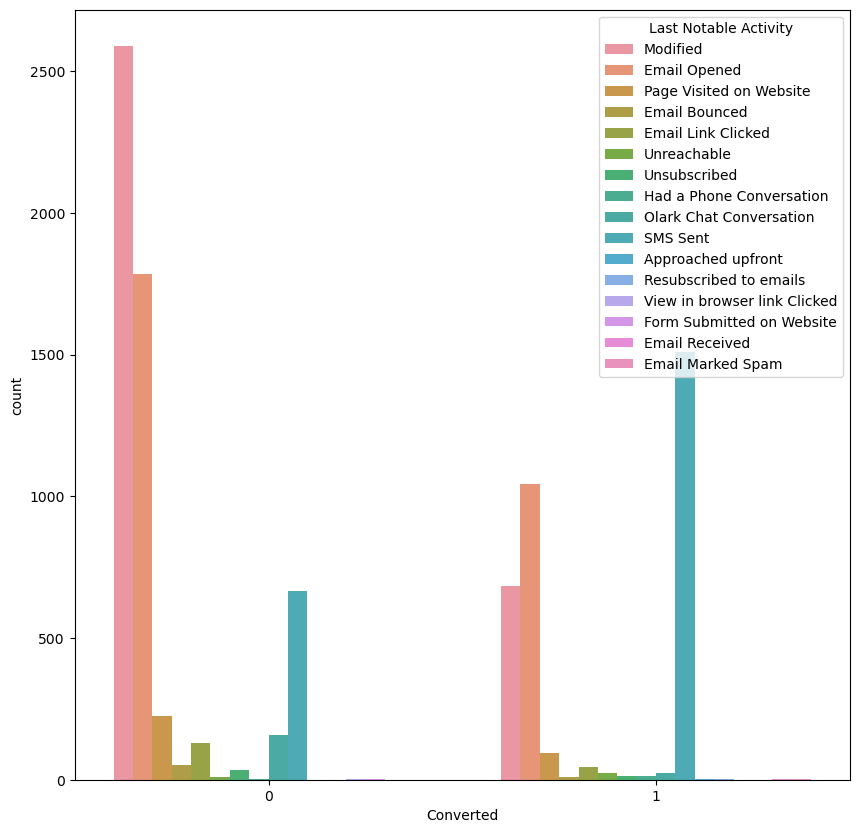

In [46]:
# Graphs of categorical columns
for i in categorical_columns:
    plt.figure(figsize=(10,10))
    sns.countplot(data = lead_df , x="Converted" , hue=i)
    plt.show()

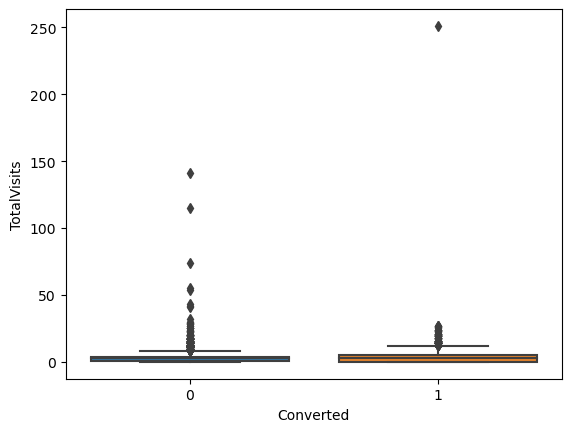

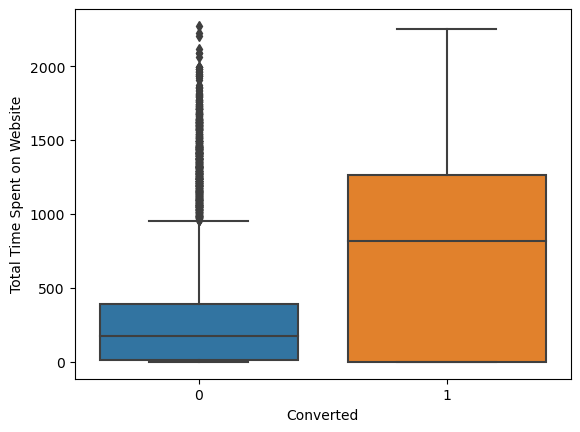

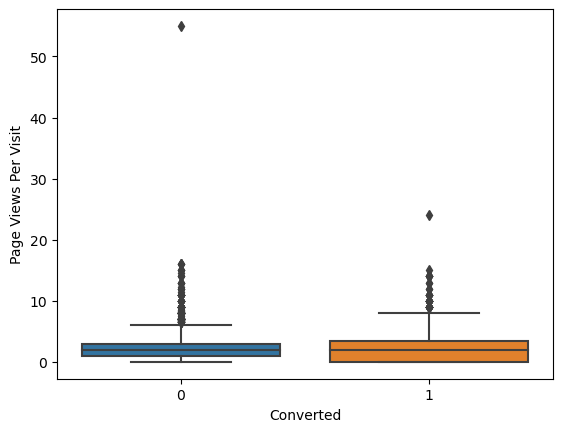

In [146]:
# Graphs of continuous_columns
for i in continuous_columns:
    sns.boxplot(x="Converted",y=i,data = lead_df)
    plt.show()

### Data Preperation

In [47]:
for el in (lead_df.columns):
    print(lead_df[el].value_counts(normalize  = True))

Landing Page Submission    0.536746
API                        0.393057
Lead Add Form              0.066791
Lead Import                0.003405
Name: Lead Origin, dtype: float64
0    0.619796
1    0.380204
Name: Converted, dtype: float64
0.0      0.240470
2.0      0.184555
3.0      0.143469
4.0      0.123036
5.0      0.086016
6.0      0.051192
1.0      0.043392
7.0      0.033945
8.0      0.024607
9.0      0.018016
10.0     0.012523
11.0     0.009447
13.0     0.005273
12.0     0.004943
14.0     0.003955
16.0     0.002307
15.0     0.001977
17.0     0.001758
18.0     0.001648
20.0     0.001318
19.0     0.000989
21.0     0.000659
23.0     0.000659
24.0     0.000549
25.0     0.000549
27.0     0.000549
22.0     0.000330
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0     0.000110
Name: TotalVisits, dtype

### Mapping of Yes and Nos for the column "A free copy of Mastering The Interview"

In [48]:
lead_df["A free copy of Mastering The Interview"] = lead_df["A free copy of Mastering The Interview"].map({"Yes" : 1 , "No" : 0})

### Making dummies for categorical Columns

In [49]:
# for categorical columns making dummies
dummy_data = pd.get_dummies(lead_df[["Lead Origin","Country","Last Activity","Last Notable Activity","Specialization","What is your current occupation","Tags","City"]],drop_first = True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Concatenating the Dummy variables with the dataframes

In [50]:
# Concatinating the lead and dummy data
lead_df = pd.concat([lead_df,dummy_data], axis=1)
lead_df.head()

,Lead Origin,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Tags,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,API,0,0.0,0,0.0,Page Visited on Website,India,Finance Management,Unemployed,Interested in other courses,...,0,0,0,0,0,0,0,0,0,0
1,API,0,5.0,674,2.5,Email Opened,India,Finance Management,Unemployed,Ringing,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Ringing,...,0,0,0,0,0,0,0,0,0,0
4,Landing Page Submission,1,2.0,1428,1.0,Converted to Lead,India,Finance Management,Unemployed,Will revert after reading the email,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# Dropping the columns which are already maked as dummy 
lead_df = lead_df.drop(columns=["Lead Origin","Country","Last Activity","Last Notable Activity","Specialization","What is your current occupation","Tags","City"], axis=1)
lead_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Australia,Country_Bahrain,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into Train and Test set 

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X = lead_df.drop(columns = ["Converted"] , axis =1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Australia,Country_Bahrain,Country_Bangladesh,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
y = lead_df["Converted"]
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [55]:
# Splitting the data for train and test set.
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size = 0.7 ,test_size = 0.3 , random_state = 100)

### Feature Scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

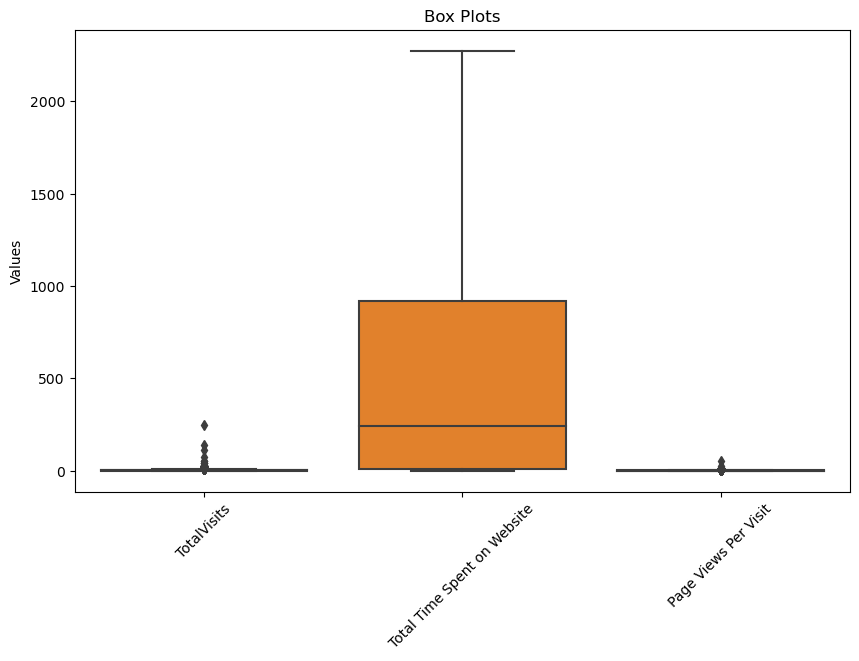

In [57]:
# Plotting boxplot to check for ay outlier values
columns_to_plot = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit'] 

plt.figure(figsize=(10, 6))
sns.boxplot(data=lead_df[columns_to_plot])
plt.title("Box Plots")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

In [58]:
# Since there are no major outliears therefore using MinMax Scalar for standardising the data
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Australia,Country_Bahrain,Country_Bangladesh,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
count,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,...,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000,6372.000000
mean,0.013831,0.213330,0.043001,0.316855,0.536566,0.067797,0.004080,0.001726,0.000471,0.000314,...,0.009730,0.003296,0.003766,0.026051,0.005179,0.076899,0.048807,0.040176,0.080979,0.008475
std,0.020226,0.242150,0.039914,0.465287,0.498700,0.251416,0.063752,0.041516,0.021695,0.017715,...,0.098168,0.057318,0.061261,0.159301,0.071784,0.266452,0.215482,0.196387,0.272825,0.091674
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.003984,0.003995,0.018182,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.011952,0.107856,0.036364,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.019920,0.407457,0.054545,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection using RFE

In [59]:
# Importing all the libraries related to model Building 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [60]:
logreg = LogisticRegression()

In [61]:
rfe = RFE(logreg, n_features_to_select = 30)            
rfe = rfe.fit(X_train, y_train)

In [62]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
       False, False, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False, False, False,  True,  True,
        True,  True, False,  True,  True, False, False, False, False,
       False])

In [63]:
#List of variables selected in top 30 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 59),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Country_Australia', False, 58),
 ('Country_Bahrain', False, 62),
 ('Country_Bangladesh', False, 31),
 ('Country_Belgium', False, 48),
 ('Country_Canada', False, 18),
 ('Country_China', False, 44),
 ('Country_Denmark', False, 88),
 ('Country_France', False, 69),
 ('Country_Germany', False, 52),
 ('Country_Ghana', False, 36),
 ('Country_Hong Kong', True, 1),
 ('Country_India', False, 27),
 ('Country_Indonesia', False, 79),
 ('Country_Italy', True, 1),
 ('Country_Kenya', False, 90),
 ('Country_Kuwait', False, 51),
 ('Country_Liberia', False, 97),
 ('Country_Malaysia', False, 89),
 ('Country_Netherlands', False, 63),
 ('Country_Nigeria', False, 73),
 ('Country_Oman', False, 28),
 ('Country_Philipp

In [64]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Country_Hong Kong', 'Country_Italy', 'Country_Qatar',
       'Country_United Kingdom', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_number not provided', 'Tags_switched off',
       'Tags_wrong number given'],
      dtype='object')


In [65]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Country_Australia',
       'Country_Bahrain', 'Country_Bangladesh', 'Country_Belgium',
       'Country_Canada', 'Country_China', 'Country_Denmark', 'Country_France',
       'Country_Germany', 'Country_Ghana', 'Country_India',
       'Country_Indonesia', 'Country_Kenya', 'Country_Kuwait',
       'Country_Liberia', 'Country_Malaysia', 'Country_Netherlands',
       'Country_Nigeria', 'Country_Oman', 'Country_Philippines',
       'Country_Russia', 'Country_Saudi Arabia', 'Country_Singapore',
       'Country_South Africa', 'Country_Sri Lanka', 'Country_Sweden',
       'Country_Switzerland', 'Country_Tanzania', 'Country_Uganda',
       'Country_United Arab Emirates', 'Country_United States',
       'Country_Vietnam', 'Country_unknown', 'Last Activity_Converted to Lead',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity

### VIF Calculation function

In [66]:
# Function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [67]:
# dataframe with RFE selected variables

X_train_rfe_1 = X_train[col]

In [68]:
# Checking th Variance Inflation Factor for the RFE selected variables

calculateVIF(X_train_rfe_1)

,Features,VIF
16,What is your current occupation_Unemployed,8.66
15,Last Notable Activity_SMS Sent,6.57
11,Last Activity_SMS Sent,6.34
24,Tags_Will revert after reading the email,4.89
2,Page Views Per Visit,3.24
13,Last Notable Activity_Modified,2.28
1,Total Time Spent on Website,2.17
0,TotalVisits,1.98
23,Tags_Ringing,1.94
17,What is your current occupation_Working Profes...,1.81


## Builing 1st Model

In [69]:
# Model 1
X_train_sm_1 = sm.add_constant(X_train_rfe_1)
logm1 = sm.GLM(y_train,X_train_sm_1, family = sm.families.Binomial())
result = logm1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1693.3
Date:                Sun, 13 Aug 2023   Deviance:                       3386.7
Time:                        17:58:42   Pearson chi2:                 9.88e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5490
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.3560      0.376     -8.929      0.000      -4.093      -2.619
TotalVisits                                              5.3533      1.730      3.094      0.002       1.962       8.744
Total Time Spent on Website                              4.5095      0.204     22.124      0.000       4.110       4.909
Page Views Per Visit                                    -5.1066      1.341     -3.808      0.000      -7.735      -2.479
Lead Origin_Lead Add Form                                3.4004      0.274     12.408      0.000       2.863       3.937
Lead Origin_Lead Import                                  1.7469      0.621      2.812      0.005       0.529       2.965
Country_Hong Kong                                        5.1917      1.629      3.187      0.001       1.999       8.385
Country_Italy                                          -24.5054      8e+04     -0.000      1.000   -1.57e+05    1.57e+05
Country_Qatar                                          -24.1018    3.7e+04     -0.001      0.999   -7.26e+04    7.26e+04
Country_United Kingdom                                   2.6185      1.091      2.400      0.016       0.480       4.757
Last Activity_Email Bounced                             -1.5322      0.380     -4.034      0.000      -2.277      -0.788
Last Activity_Had a Phone Conversation                   1.8942      0.838      2.259      0.024       0.251       3.538
Last Activity_SMS Sent                                   0.9052      0.184      4.909      0.000       0.544       1.267
Last Activity_Unreachable                                0.9965      0.406      2.455      0.014       0.201       1.792
Last Notable Activity_Modified                          -1.2566      0.120    -10.486      0.000      -1.491      -1.022
Last Notable Activity_Olark Chat Conversation           -1.5925      0.354     -4.492      0.000      -2.287      -0.898
Last Notable Activity_SMS Sent                           1.2379      0.219      5.646      0.000       0.808       1.668
What is your current occupation_Unemployed              -1.5579      0.336     -4.632      0.000      -2.217      -0.899
What is your current occupation_Working Professional     1.2985      0.410      3.166      0.002       0.495       2.102
Tags_Busy                                                2.9760      0.329      9.045      0.000       2.331       3.621
Tags_Closed by Horizzon                                  8.6850      0.767     11.325      0.000       7.182      10.188
Tags_Interested in Next batch                           24.9334   6.25e+04      0.000      1.000   -1.23e+05    1.23e+05
Tags_Lateral student                                    28

In [70]:
# Again running the ref to drop next 10 variables

rfe = RFE(logreg, n_features_to_select = 20)            
rfe = rfe.fit(X_train_rfe_1, y_train)

In [71]:
#List of variables selected in top 20 list

list(zip(X_train_rfe_1.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', False, 11),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Country_Hong Kong', False, 6),
 ('Country_Italy', False, 10),
 ('Country_Qatar', False, 7),
 ('Country_United Kingdom', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_SMS Sent', False, 5),
 ('Last Activity_Unreachable', False, 8),
 ('Last Notable Activity_Modified', False, 3),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Interested in Next batch', True, 1),
 ('Tags_Lateral student', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will r

In [72]:
# selecting the selected variable via RFE in col list

col2 = X_train_rfe_1.columns[rfe.support_]
print(col2)

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Country_United Kingdom',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_number not provided',
       'Tags_switched off', 'Tags_wrong number given'],
      dtype='object')


In [73]:
# checking which columns has been rejected

X_train_rfe_1.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Country_Hong Kong',
       'Country_Italy', 'Country_Qatar', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Notable Activity_Modified',
       'Tags_in touch with EINS', 'Tags_invalid number'],
      dtype='object')

In [74]:
# dataframe with RFE selected variables

X_train_rfe_2 = X_train[col2]

In [75]:
# Checking th Variance Inflation Factor for the RFE selected variables

calculateVIF(X_train_rfe_2)

,Features,VIF
8,What is your current occupation_Unemployed,5.62
16,Tags_Will revert after reading the email,4.55
0,Total Time Spent on Website,1.98
15,Tags_Ringing,1.81
9,What is your current occupation_Working Profes...,1.59
7,Last Notable Activity_SMS Sent,1.56
11,Tags_Closed by Horizzon,1.35
1,Lead Origin_Lead Add Form,1.33
18,Tags_switched off,1.16
10,Tags_Busy,1.15


## Building 2nd Model

In [76]:
# Model 2
X_train_sm_2 = sm.add_constant(X_train_rfe_2)
logm2 = sm.GLM(y_train,X_train_sm_2, family = sm.families.Binomial())
result = logm2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1773.0
Date:                Sun, 13 Aug 2023   Deviance:                       3546.0
Time:                        17:58:43   Pearson chi2:                 1.09e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5376
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9914      0.362    -11.038      0.000      -4.700      -3.283
Total Time Spent on Website                              4.4124      0.187     23.659      0.000       4.047       4.778
Lead Origin_Lead Add Form                                3.6987      0.265     13.944      0.000       3.179       4.219
Lead Origin_Lead Import                                  2.1644      0.612      3.537      0.000       0.965       3.364
Country_United Kingdom                                   2.5029      1.034      2.421      0.015       0.477       4.529
Last Activity_Email Bounced                             -1.9727      0.362     -5.452      0.000      -2.682      -1.264
Last Activity_Had a Phone Conversation                   1.7854      0.801      2.230      0.026       0.216       3.355
Last Notable Activity_Olark Chat Conversation           -1.0927      0.346     -3.159      0.002      -1.771      -0.415
Last Notable Activity_SMS Sent                           2.4757      0.114     21.769      0.000       2.253       2.699
What is your current occupation_Unemployed              -1.5057      0.329     -4.582      0.000      -2.150      -0.862
What is your current occupation_Working Professional     1.2579      0.403      3.120      0.002       0.468       2.048
Tags_Busy                                                3.1020      0.319      9.739      0.000       2.478       3.726
Tags_Closed by Horizzon                                  8.2850      0.754     10.988      0.000       6.807       9.763
Tags_Interested in Next batch                           25.0908   6.19e+04      0.000      1.000   -1.21e+05    1.21e+05
Tags_Lateral student                                    28.7415   5.97e+04      0.000      1.000   -1.17e+05    1.17e+05
Tags_Lost to EINS                                        8.5984      0.766     11.231      0.000       7.098      10.099
Tags_Ringing                                            -1.1381      0.330     -3.445      0.001      -1.786      -0.491
Tags_Will revert after reading the email                 3.7232      0.223     16.691      0.000       3.286       4.160
Tags_number not provided                               -22.0261   2.32e+04     -0.001      0.999   -4.56e+04    4.55e+04
Tags_switched off                                       -1.2120      0.643     -1.886      0.059      -2.471       0.047
Tags_wrong number given                                -21.6253   1.92e+04     -0.001      0.999   -3.76e+04    3.76e+04
========================================================================================================================
"""

In [77]:
# As P value is high for Tags_Interested in Next batch therefore dropping this column
col3= col2.drop("Tags_Interested in Next batch")

## Building 3rd model

In [78]:
# Model 3
X_train_sm_3 = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm_3, family = sm.families.Binomial())
result = logm3.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1776.5
Date:                Sun, 13 Aug 2023   Deviance:                       3553.1
Time:                        17:58:43   Pearson chi2:                 1.09e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5371
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9328      0.356    -11.058      0.000      -4.630      -3.236
Total Time Spent on Website                              4.4226      0.186     23.748      0.000       4.058       4.788
Lead Origin_Lead Add Form                                3.7178      0.265     14.053      0.000       3.199       4.236
Lead Origin_Lead Import                                  2.1685      0.611      3.547      0.000       0.970       3.367
Country_United Kingdom                                   2.4288      1.027      2.365      0.018       0.416       4.442
Last Activity_Email Bounced                             -1.9702      0.362     -5.448      0.000      -2.679      -1.261
Last Activity_Had a Phone Conversation                   1.7859      0.800      2.233      0.026       0.219       3.353
Last Notable Activity_Olark Chat Conversation           -1.0908      0.346     -3.153      0.002      -1.769      -0.413
Last Notable Activity_SMS Sent                           2.4979      0.114     21.967      0.000       2.275       2.721
What is your current occupation_Unemployed              -1.4779      0.326     -4.539      0.000      -2.116      -0.840
What is your current occupation_Working Professional     1.2692      0.400      3.172      0.002       0.485       2.053
Tags_Busy                                                3.0013      0.311      9.641      0.000       2.391       3.611
Tags_Closed by Horizzon                                  8.1968      0.751     10.913      0.000       6.725       9.669
Tags_Lateral student                                    28.6519   5.96e+04      0.000      1.000   -1.17e+05    1.17e+05
Tags_Lost to EINS                                        8.5105      0.763     11.158      0.000       7.016      10.005
Tags_Ringing                                            -1.2495      0.323     -3.870      0.000      -1.882      -0.617
Tags_Will revert after reading the email                 3.6310      0.213     17.059      0.000       3.214       4.048
Tags_number not provided                               -22.1353   2.32e+04     -0.001      0.999   -4.55e+04    4.55e+04
Tags_switched off                                       -1.3182      0.639     -2.063      0.039      -2.571      -0.066
Tags_wrong number given                                -21.7325   1.92e+04     -0.001      0.999   -3.76e+04    3.75e+04
========================================================================================================================
"""

In [79]:
# Checking VIF values 
calculateVIF(X_train[col3])

,Features,VIF
8,What is your current occupation_Unemployed,5.61
15,Tags_Will revert after reading the email,4.53
0,Total Time Spent on Website,1.98
14,Tags_Ringing,1.80
9,What is your current occupation_Working Profes...,1.59
7,Last Notable Activity_SMS Sent,1.55
11,Tags_Closed by Horizzon,1.35
1,Lead Origin_Lead Add Form,1.33
17,Tags_switched off,1.16
10,Tags_Busy,1.15


In [80]:
# As P value is high for Tags_Lateral student therefore dropping this column
col4= col3.drop("Tags_Lateral student")

## Building 4th Model

In [81]:
# Model 4
X_train_sm_4 = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm_4, family = sm.families.Binomial())
result = logm4.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1786.4
Date:                Sun, 13 Aug 2023   Deviance:                       3572.7
Time:                        17:58:43   Pearson chi2:                 1.10e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5356
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8623      0.350    -11.037      0.000      -4.548      -3.176
Total Time Spent on Website                              4.4039      0.186     23.738      0.000       4.040       4.768
Lead Origin_Lead Add Form                                3.7254      0.264     14.135      0.000       3.209       4.242
Lead Origin_Lead Import                                  2.1607      0.610      3.541      0.000       0.965       3.357
Country_United Kingdom                                   2.3551      1.020      2.309      0.021       0.356       4.354
Last Activity_Email Bounced                             -1.9694      0.361     -5.454      0.000      -2.677      -1.262
Last Activity_Had a Phone Conversation                   1.7820      0.797      2.235      0.025       0.219       3.345
Last Notable Activity_Olark Chat Conversation           -1.0922      0.345     -3.163      0.002      -1.769      -0.415
Last Notable Activity_SMS Sent                           2.4937      0.113     21.995      0.000       2.272       2.716
What is your current occupation_Unemployed              -1.4465      0.322     -4.490      0.000      -2.078      -0.815
What is your current occupation_Working Professional     1.2807      0.396      3.231      0.001       0.504       2.058
Tags_Busy                                                2.9070      0.306      9.492      0.000       2.307       3.507
Tags_Closed by Horizzon                                  8.0981      0.749     10.812      0.000       6.630       9.566
Tags_Lost to EINS                                        8.4111      0.761     11.059      0.000       6.920       9.902
Tags_Ringing                                            -1.3421      0.318     -4.220      0.000      -1.965      -0.719
Tags_Will revert after reading the email                 3.5349      0.206     17.198      0.000       3.132       3.938
Tags_number not provided                               -22.2229   2.32e+04     -0.001      0.999   -4.55e+04    4.55e+04
Tags_switched off                                       -1.4087      0.637     -2.213      0.027      -2.656      -0.161
Tags_wrong number given                                -21.8236   1.92e+04     -0.001      0.999   -3.76e+04    3.75e+04
========================================================================================================================
"""

In [82]:
# Checking VIF values 
calculateVIF(X_train[col4])

,Features,VIF
8,What is your current occupation_Unemployed,5.59
14,Tags_Will revert after reading the email,4.52
0,Total Time Spent on Website,1.98
13,Tags_Ringing,1.80
9,What is your current occupation_Working Profes...,1.59
7,Last Notable Activity_SMS Sent,1.55
11,Tags_Closed by Horizzon,1.35
1,Lead Origin_Lead Add Form,1.33
16,Tags_switched off,1.16
10,Tags_Busy,1.15


In [83]:
# As P value is high for Tags_number not provided therefore dropping this column
col5= col4.drop("Tags_number not provided")

## Building 5th Model

In [84]:
# Model 5
X_train_sm_5 = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm_5, family = sm.families.Binomial())
result = logm5.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1788.5
Date:                Sun, 13 Aug 2023   Deviance:                       3577.0
Time:                        17:58:44   Pearson chi2:                 1.10e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.5353
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9019      0.352    -11.075      0.000      -4.592      -3.211
Total Time Spent on Website                              4.3924      0.185     23.715      0.000       4.029       4.755
Lead Origin_Lead Add Form                                3.7278      0.264     14.125      0.000       3.211       4.245
Lead Origin_Lead Import                                  2.1439      0.606      3.537      0.000       0.956       3.332
Country_United Kingdom                                   2.4068      1.024      2.351      0.019       0.400       4.413
Last Activity_Email Bounced                             -1.9707      0.361     -5.456      0.000      -2.679      -1.263
Last Activity_Had a Phone Conversation                   1.7831      0.798      2.234      0.025       0.219       3.348
Last Notable Activity_Olark Chat Conversation           -1.0924      0.345     -3.164      0.002      -1.769      -0.416
Last Notable Activity_SMS Sent                           2.4814      0.113     21.989      0.000       2.260       2.703
What is your current occupation_Unemployed              -1.4669      0.324     -4.529      0.000      -2.102      -0.832
What is your current occupation_Working Professional     1.2720      0.398      3.192      0.001       0.491       2.053
Tags_Busy                                                2.9766      0.306      9.733      0.000       2.377       3.576
Tags_Closed by Horizzon                                  8.1591      0.749     10.891      0.000       6.691       9.627
Tags_Lost to EINS                                        8.4725      0.761     11.137      0.000       6.981       9.963
Tags_Ringing                                            -1.2681      0.317     -3.997      0.000      -1.890      -0.646
Tags_Will revert after reading the email                 3.5989      0.206     17.486      0.000       3.196       4.002
Tags_switched off                                       -1.3358      0.636     -2.100      0.036      -2.582      -0.089
Tags_wrong number given                                -20.7493   1.16e+04     -0.002      0.999   -2.28e+04    2.28e+04
========================================================================================================================
"""

In [85]:
# Checking VIF values 
calculateVIF(X_train[col5])

,Features,VIF
8,What is your current occupation_Unemployed,5.52
14,Tags_Will revert after reading the email,4.45
0,Total Time Spent on Website,1.98
13,Tags_Ringing,1.78
9,What is your current occupation_Working Profes...,1.59
7,Last Notable Activity_SMS Sent,1.55
11,Tags_Closed by Horizzon,1.35
1,Lead Origin_Lead Add Form,1.33
15,Tags_switched off,1.16
10,Tags_Busy,1.14


In [86]:
# As P value is high for Tags_wrong number given therefore dropping this column
col6= col5.drop("Tags_wrong number given")

## Builing 6th Model

In [87]:
# Model 6
X_train_sm_6 = sm.add_constant(X_train[col6])
logm6 = sm.GLM(y_train,X_train_sm_6, family = sm.families.Binomial())
result = logm6.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1790.8
Date:                Sun, 13 Aug 2023   Deviance:                       3581.6
Time:                        17:58:44   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5350
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9551      0.355    -11.142      0.000      -4.651      -3.259
Total Time Spent on Website                              4.3918      0.185     23.717      0.000       4.029       4.755
Lead Origin_Lead Add Form                                3.7343      0.264     14.123      0.000       3.216       4.253
Lead Origin_Lead Import                                  2.1319      0.603      3.536      0.000       0.950       3.313
Country_United Kingdom                                   2.4702      1.028      2.402      0.016       0.455       4.486
Last Activity_Email Bounced                             -1.9734      0.361     -5.460      0.000      -2.682      -1.265
Last Activity_Had a Phone Conversation                   1.7838      0.799      2.231      0.026       0.217       3.351
Last Notable Activity_Olark Chat Conversation           -1.0932      0.345     -3.165      0.002      -1.770      -0.416
Last Notable Activity_SMS Sent                           2.4671      0.112     21.990      0.000       2.247       2.687
What is your current occupation_Unemployed              -1.4912      0.326     -4.573      0.000      -2.130      -0.852
What is your current occupation_Working Professional     1.2622      0.401      3.145      0.002       0.476       2.049
Tags_Busy                                                3.0616      0.304     10.057      0.000       2.465       3.658
Tags_Closed by Horizzon                                  8.2359      0.749     10.995      0.000       6.768       9.704
Tags_Lost to EINS                                        8.5502      0.761     11.241      0.000       7.059      10.041
Tags_Ringing                                            -1.1796      0.315     -3.740      0.000      -1.798      -0.561
Tags_Will revert after reading the email                 3.6782      0.205     17.949      0.000       3.277       4.080
Tags_switched off                                       -1.2479      0.635     -1.965      0.049      -2.493      -0.003
========================================================================================================================
"""

In [88]:
# Checking VIF values 
calculateVIF(X_train[col6])

,Features,VIF
8,What is your current occupation_Unemployed,5.39
14,Tags_Will revert after reading the email,4.35
0,Total Time Spent on Website,1.98
13,Tags_Ringing,1.76
9,What is your current occupation_Working Profes...,1.58
7,Last Notable Activity_SMS Sent,1.54
11,Tags_Closed by Horizzon,1.35
1,Lead Origin_Lead Add Form,1.33
15,Tags_switched off,1.15
10,Tags_Busy,1.14


In [89]:
# As P value is high for Tags_switched off therefore dropping this column
col7= col6.drop("Tags_switched off")

## Building 7th Model

In [90]:
# Model 7
X_train_sm_7 = sm.add_constant(X_train[col7])
logm7 = sm.GLM(y_train,X_train_sm_7, family = sm.families.Binomial())
result = logm7.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1793.3
Date:                Sun, 13 Aug 2023   Deviance:                       3586.7
Time:                        17:58:44   Pearson chi2:                 1.06e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5346
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.1003      0.357    -11.501      0.000      -4.799      -3.401
Total Time Spent on Website                              4.3943      0.185     23.738      0.000       4.031       4.757
Lead Origin_Lead Add Form                                3.7510      0.266     14.125      0.000       3.231       4.271
Lead Origin_Lead Import                                  2.1301      0.603      3.531      0.000       0.948       3.312
Country_United Kingdom                                   2.6182      1.038      2.522      0.012       0.583       4.653
Last Activity_Email Bounced                             -1.9775      0.362     -5.462      0.000      -2.687      -1.268
Last Activity_Had a Phone Conversation                   1.7856      0.802      2.226      0.026       0.213       3.358
Last Notable Activity_Olark Chat Conversation           -1.0946      0.346     -3.165      0.002      -1.772      -0.417
Last Notable Activity_SMS Sent                           2.4403      0.111     22.011      0.000       2.223       2.658
What is your current occupation_Unemployed              -1.5287      0.330     -4.637      0.000      -2.175      -0.883
What is your current occupation_Working Professional     1.2538      0.406      3.087      0.002       0.458       2.050
Tags_Busy                                                3.2574      0.296     11.010      0.000       2.678       3.837
Tags_Closed by Horizzon                                  8.4164      0.747     11.270      0.000       6.953       9.880
Tags_Lost to EINS                                        8.7327      0.758     11.514      0.000       7.246      10.219
Tags_Ringing                                            -0.9786      0.306     -3.197      0.001      -1.579      -0.379
Tags_Will revert after reading the email                 3.8633      0.195     19.795      0.000       3.481       4.246
========================================================================================================================
"""

In [91]:
# Checking VIF values 
calculateVIF(X_train[col7])

,Features,VIF
8,What is your current occupation_Unemployed,4.81
14,Tags_Will revert after reading the email,3.94
0,Total Time Spent on Website,1.98
13,Tags_Ringing,1.66
9,What is your current occupation_Working Profes...,1.55
7,Last Notable Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.33
11,Tags_Closed by Horizzon,1.33
10,Tags_Busy,1.12
12,Tags_Lost to EINS,1.12


In [92]:
# As VIF value is high for What is your current occupation_Unemployed therefore dropping this column
col8= col7.drop("What is your current occupation_Unemployed")

## Building 8th Column

In [93]:
# Model 8
X_train_sm_8 = sm.add_constant(X_train[col8])
logm8 = sm.GLM(y_train,X_train_sm_8, family = sm.families.Binomial())
result = logm8.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1804.4
Date:                Sun, 13 Aug 2023   Deviance:                       3608.9
Time:                        17:58:44   Pearson chi2:                 1.04e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5330
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.5329      0.205    -27.027      0.000      -5.934      -5.132
Total Time Spent on Website                              4.4185      0.185     23.907      0.000       4.056       4.781
Lead Origin_Lead Add Form                                3.7749      0.264     14.313      0.000       3.258       4.292
Lead Origin_Lead Import                                  2.1061      0.602      3.500      0.000       0.927       3.286
Country_United Kingdom                                   2.5359      1.033      2.455      0.014       0.511       4.561
Last Activity_Email Bounced                             -1.9359      0.363     -5.331      0.000      -2.648      -1.224
Last Activity_Had a Phone Conversation                   1.7554      0.802      2.189      0.029       0.184       3.327
Last Notable Activity_Olark Chat Conversation           -1.0919      0.341     -3.200      0.001      -1.761      -0.423
Last Notable Activity_SMS Sent                           2.4236      0.110     21.963      0.000       2.207       2.640
What is your current occupation_Working Professional     2.7408      0.251     10.923      0.000       2.249       3.233
Tags_Busy                                                3.1744      0.294     10.809      0.000       2.599       3.750
Tags_Closed by Horizzon                                  8.3478      0.746     11.193      0.000       6.886       9.810
Tags_Lost to EINS                                        8.6530      0.757     11.436      0.000       7.170      10.136
Tags_Ringing                                            -1.0727      0.305     -3.522      0.000      -1.670      -0.476
Tags_Will revert after reading the email                 3.7895      0.193     19.606      0.000       3.411       4.168
========================================================================================================================
"""

In [94]:
# Checking VIF values 
calculateVIF(X_train[col8])

,Features,VIF
13,Tags_Will revert after reading the email,1.89
0,Total Time Spent on Website,1.83
7,Last Notable Activity_SMS Sent,1.52
1,Lead Origin_Lead Add Form,1.32
10,Tags_Closed by Horizzon,1.22
8,What is your current occupation_Working Profes...,1.17
12,Tags_Ringing,1.14
9,Tags_Busy,1.06
11,Tags_Lost to EINS,1.05
4,Last Activity_Email Bounced,1.03


In [95]:
# These are the columns which are helping for conversion on lead.
result.params.sort_values(ascending=False)

Tags_Lost to EINS                                       8.653036
Tags_Closed by Horizzon                                 8.347782
Total Time Spent on Website                             4.418468
Tags_Will revert after reading the email                3.789458
Lead Origin_Lead Add Form                               3.774927
Tags_Busy                                               3.174371
What is your current occupation_Working Professional    2.740765
Country_United Kingdom                                  2.535873
Last Notable Activity_SMS Sent                          2.423620
Lead Origin_Lead Import                                 2.106107
Last Activity_Had a Phone Conversation                  1.755388
Tags_Ringing                                           -1.072695
Last Notable Activity_Olark Chat Conversation          -1.091940
Last Activity_Email Bounced                            -1.935859
const                                                  -5.532856
dtype: float64

# Making Predictions on the Train Set

In [96]:
# Getting the predicted values on the train set
y_train_pred = result.predict(X_train_sm_8)
y_train_pred.head()

7962    0.357278
5520    0.096145
1962    0.005479
1566    0.968664
9170    0.003939
dtype: float64

In [97]:
# Reshaping into an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.35727786, 0.09614455, 0.00547855, ..., 0.99778112, 0.97224809,
       0.00174265])

### Creating the dataframe with Actual and predicted values

In [98]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.357278,7962
1,0,0.096145,5520
2,0,0.005479,1962
3,1,0.968664,1566
4,0,0.003939,9170


## Creating new column 'predicted' with 1 if Converted_prob > 0.5 else 0

In [99]:
# Making a new column with 0 & 1 with cut-off of 0.5 i.e >0.5 means 1 else 0
y_train_pred_final["Predicted"] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x>0.5 else 0)

In [100]:
# Checking the dataframe
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.357278,7962,0
1,0,0.096145,5520,0
2,0,0.005479,1962,0
3,1,0.968664,1566,1
4,0,0.003939,9170,0


## Confusion Matrix

In [101]:
from sklearn import metrics

In [102]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3656  297]
 [ 382 2037]]


In [103]:
# Checking the accuracy of metrics
print('Accuracy :',metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

Accuracy : 0.8934400502197113


In [104]:
# for checking the sensitivity and Sensitivity making metrics into numbers
TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0]

In [105]:
# Sensitivity 
"Sensitivity:",TP / float(TP+FN)

('Sensitivity:', 0.8420835055808186)

In [106]:
# Specificity
"Specificity:",TN / float(TN+FP)

('Specificity:', 0.924867189476347)

## AUC-ROC Curve Function

In [107]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [108]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"], drop_intermediate = False )

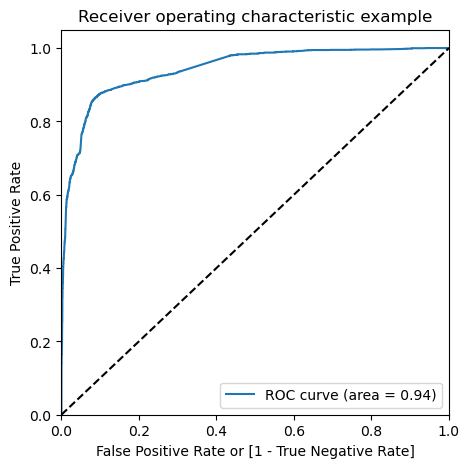

In [109]:
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_prob"])

## Finding Optimal Cut-off Point

In [110]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final["Converted_prob"].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.357278,7962,0,1,1,1,1,0,0,0,0,0,0
1,0,0.096145,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.005479,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.968664,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.003939,9170,0,1,0,0,0,0,0,0,0,0,0


In [111]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.713591  0.981397  0.549709
0.2   0.2  0.832549  0.910707  0.784720
0.3   0.3  0.884495  0.881769  0.886162
0.4   0.4  0.894852  0.865234  0.912977
0.5   0.5  0.893440  0.842084  0.924867
0.6   0.6  0.886064  0.801158  0.938022
0.7   0.7  0.859542  0.690368  0.963066
0.8   0.8  0.840239  0.606862  0.983051
0.9   0.9  0.805242  0.503514  0.989881


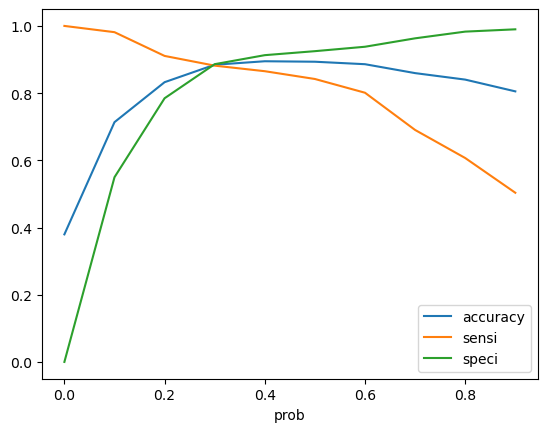

In [112]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the above graph 0.29 can be considered as cut-off value 

In [113]:
y_train_pred_final['final_predict'] = y_train_pred_final["Converted_prob"].map(lambda x: 1 if x > 0.29 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predict
0,0,0.357278,7962,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.096145,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.005479,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.968664,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.003939,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [114]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predict)

0.8826114249843063

In [115]:
# Confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["final_predict"])
print(confusion2)

[[3485  468]
 [ 280 2139]]


In [116]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [117]:
# Let's see the sensitivity of our logistic regression model
"Sensitivity:", TP2 / float(TP2+FN2)

('Sensitivity:', 0.8842496899545267)

In [118]:
# Let us calculate specificity
"specificity:" ,TN2 / float(TN2+FP2)

('specificity:', 0.8816089046293955)

## Precision and Recall

In [119]:
# Precision
TP / TP + FP
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.8727506426735219


In [120]:
# Recall
TP / TP + FN
print("Recall :",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall : 0.8420835055808186


In [121]:
# finding the trade off for presion and recall
from sklearn.metrics import precision_recall_curve

In [122]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

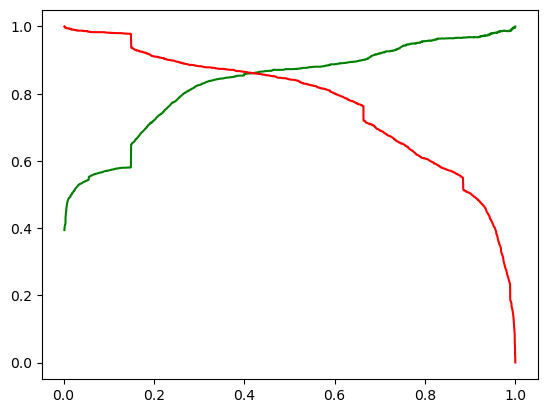

In [123]:
# plotting a trade-off curve between precision and recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making Prediction on the Test Dataset

In [124]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_Australia,Country_Bahrain,Country_Bangladesh,...,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
3504,3.0,424,3.00,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,0.0,0,0.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7201,2.0,712,2.00,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1196,4.0,423,4.00,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8219,7.0,247,1.75,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [125]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [126]:
# Adding columns which are there in train set
X_test=X_test[col8]

In [127]:
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Country_United Kingdom,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email
3504,0.188194,0,0,0,0,0,0,0,0,0,0,0,1,0
4050,0.000000,1,0,0,0,0,0,1,0,0,0,0,0,1
7201,0.316023,0,0,0,0,0,0,1,0,0,0,0,0,0
1196,0.187750,0,0,0,0,0,0,0,0,0,0,0,1,0
8219,0.109632,0,0,0,0,0,0,0,0,0,0,1,0,0


In [128]:
# Adding a const
X_test_sm = sm.add_constant(X_test)

In [129]:
# Predictions on the test set
y_test_pred = result.predict(X_test_sm)
y_test_pred.head()

3504    0.003098
4050    0.988515
7201    0.152788
1196    0.003092
8219    0.973521
dtype: float64

In [130]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
3504,0.003098
4050,0.988515
7201,0.152788
1196,0.003092
8219,0.973521


In [131]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [132]:
# Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [133]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [134]:
# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [135]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.003098
1,1,4050,0.988515
2,0,7201,0.152788
3,0,1196,0.003092
4,1,8219,0.973521


In [136]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.003098
1,1,4050,0.988515
2,0,7201,0.152788
3,0,1196,0.003092
4,1,8219,0.973521


In [137]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(columns=['Prospect ID','Converted','Converted_prob'])
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3504,0,0.003098
1,4050,1,0.988515
2,7201,0,0.152788
3,1196,0,0.003092
4,8219,1,0.973521


In [138]:
# Applying the cut off 
y_pred_final['final_predicted'] = y_pred_final["Converted_prob"].map(lambda x: 1 if x > 0.29 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3504,0,0.003098,0
1,4050,1,0.988515,1
2,7201,0,0.152788,0
3,1196,0,0.003092,0
4,8219,1,0.973521,1


In [139]:
# Overall accuracy.
print("Accuracy :",metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted"]))

Accuracy : 0.8861222995239839


In [140]:
# Making the confusion matrix
confusion3 = metrics.confusion_matrix(y_pred_final["Converted"], y_pred_final["final_predicted"])
confusion3

array([[1499,  190],
       [ 121,  921]], dtype=int64)

In [141]:
TP = confusion3[1,1] 
TN = confusion3[0,0] 
FP = confusion3[0,1] 
FN = confusion3[1,0]

In [142]:
# sensitivity
print("Sensitivity:",TP / float(TP+FN))

Sensitivity: 0.8838771593090211


In [143]:
# specificity
print("Specificity:",TN / float(TN+FP))

Specificity: 0.8875074008288928


In [144]:
# Lead score to the testing data
y_pred_final['Lead_Score'] = y_pred_final["Converted_prob"].map(lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted,Lead_Score
0,3504,0,0.003098,0,0
1,4050,1,0.988515,1,99
2,7201,0,0.152788,0,15
3,1196,0,0.003092,0,0
4,8219,1,0.973521,1,97
